# **Proyecto Final Laboratorio Modelado de Datos**

## **Clasificación**

### **Indice**

- [Objetivo](#objetivo)  
- [Contexto](#contexto)
  - [Codones de ADN](#codones-de-adn)
  - [Tipos de ADN](#tipos-de-adn)
  - [Los Reinos Biológicos](#los-reinos-biologicos)
  - [Datos utilizados](#datos-utilizados)
- [Importación de librerías](#importacion-de-librerias)
- [Lectura de Datos](#lectura-de-datos)
- [Características de Datos](#caracteristicas-de-datos)
- [Tratamiento de Datos](#tratamiento-de-datos)
- [Train-Test Split](#train-test-split)
- [Estandarización de Datos](#estandarizacion-de-datos)
- [Exploración y Visualización de Datos](#exploracion-y-visualizacion-de-datos)
- [Hipotesis de Modelos](#hipotesis-de-modelos)
- [Metricas a Evaluar](#metricas-a-evaluar)
- [Modelos](#modelos)
  - [XGBoost](#xgboost)
  - [Random Forest](#random-forest)
  - [SVC](#support-vector-classification-svc)
  - [MLPC](#neural-networks-mlpc)
  - [KNN](#knn)
- [Comparación de Modelos](#comparacion-de-modelos)
  - [Metricas en conjunto de Pruebas](#metricas-en-conjunto-de-pruebas)
  - [Metricas en Datos Nuevos](#metricas-en-datos-nuevos)
  - [Comparacion de Resultados](#comparacion-de-resultados)
- [Conclusiones](#conclusiones)

### **Objetivo**

El problema de clasificación que se ha elegido es el de identificar a que **reino** pertenece cada una de las especies, sin tomar en cuenta el nombre de la especie; dado que esto nos puede dar informacion muy corelacionada con el reino; lo que se busca es que se pueda generar la prediccion solamente usando información de sus estadísticas de uso de **codones** de ADN y el tipo de ADN al que pertenecen.

### **Contexto**

#### **Codones de ADN**
Los codones son secuencias de tres nucleótidos en el ADN o ARN que codifican un aminoácido específico o una señal de terminación en el proceso de síntesis de proteínas. En el ADN, las bases nitrogenadas son adenina (A), timina (T), guanina (G) y citosina (C), mientras que en el ARN, la timina es reemplazada por uracilo (U). Estas bases se agrupan en tripletes llamados codones.

Por ejemplo:

UUU y UUC codifican el aminoácido fenilalanina.
UAA, UAG y UGA son codones de terminación, señalando el fin de una secuencia proteica.  

Los codones son fundamentales porque determinan cómo se ensamblan los aminoácidos para formar proteínas, que son esenciales para las funciones celulares y el desarrollo de los organismos. Cada organismo tiene su propio "patrón" o "frecuencia" en el uso de codones, lo que puede influir en su eficiencia y adaptabilidad para producir proteínas. Estas diferencias en los patrones de uso de codones pueden ser distintivas entre diferentes reinos biológicos.

#### **Tipos de ADN**
El tipo de ADN hace referencia a la ubicación o tipo específico de material genético dentro de la célula de un organismo. Existen varias categorías, cada una con funciones y características propias:  

Genómico (0): ADN que forma el núcleo de la célula en eucariotas (como animales y plantas) y en los cromosomas en procariotas (como bacterias).  
Mitocondrial (1): ADN encontrado en las mitocondrias, orgánulos celulares responsables de producir energía. Es independiente del ADN nuclear.  
Cloroplasto (2): ADN en los cloroplastos, orgánulos responsables de la fotosíntesis en las plantas.  

Otros tipos menos comunes como cianelas (3) y apicoplastos (11) que están presentes en algunos tipos de algas y parásitos.  
Cada uno de estos tipos de ADN puede tener diferentes funciones y características, lo que permite una clasificación y análisis más detallado en estudios de genética y evolución.

#### **Los Reinos Biologicos**
Los reinos son una de las principales categorías en la clasificación biológica que agrupa a los organismos con características similares en términos de estructura, funciones celulares y genética. Los reinos considerados en este proyecto incluyen:  

Archaea ('arc'): Microorganismos unicelulares que suelen habitar en ambientes extremos. Aunque superficiales, son diferentes de las bacterias en su estructura genética y celular.  

Bacteria ('bct'): Organismos unicelulares procariontes, con una estructura celular simple sin núcleo definido.  

Virus ('vrl') y Bacteriófagos ('phg'): Partículas infecciosas compuestas principalmente de ADN o ARN y una cubierta proteica. Los virus necesitan infectar células para replicarse, y los bacteriófagos son virus que infectan bacterias.  

Plantas ('pln'): Organismos eucariontes multicelulares que realizan fotosíntesis, con ADN en el núcleo y en los cloroplastos. 

Invertebrados ('inv'): Animales sin columna vertebral, como insectos y moluscos.  

Vertebrados ('vrt'): Animales con columna vertebral, incluyendo subgrupos como mamíferos ('mam'), roedores ('rod') y primates ('pri').  

#### **Datos Utilizados**
En este proyecto, se utilizarán los patrones de uso de codones y el tipo de ADN para predecir el reino de una especie sin necesidad de conocer su nombre. Esto es útil, ya que el nombre de la especie podría proporcionar una pista directa sobre el reino, y el objetivo es realizar la clasificación basándose en datos biológicos y genéticos.

La base de datos **CUTG** (Codon Usage Tabulated from GenBank) es una fuente de datos que organiza y clasifica los patrones de uso de codones de diversas especies. Los datos en este proyecto provienen de la base CUTG sin embargo fueron descargados desde **[Kaggle](https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset/data)** y están organizados de la siguiente manera:  

Código del Reino ('Kingdom'): Cada especie está clasificada con un código de tres letras que representa su reino.  

Tipo de ADN ('DNAtype'): Un valor numérico que indica el tipo de ADN en función de su función y ubicación en la célula (por ejemplo, genómico, mitocondrial, cloroplasto, etc.).  

Frecuencia de Codones ('codon'): Representa la frecuencia de cada codón en la secuencia genética de una especie. Este valor es la cantidad de veces que un codón aparece en relación con el número total de codones en la secuencia, lo que permite normalizar y comparar los datos entre especies.  

Estos datos permitirán entrenar un modelo de clasificación que identifique el reino al que pertenece una especie basándose en su patrón de codones y su tipo de ADN.

### **Importacion de Librerias**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Lectura de Datos**

In [2]:
df = pd.read_csv("codon_usage.csv", low_memory=False)
df=df.set_index('SpeciesID')

df.head()

,Kingdom,DNAtype,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
SpeciesID,,,,,,,,,,,,,,,,,,,,,
100217,vrl,0,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
100220,vrl,0,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
100755,vrl,0,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
100880,vrl,0,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
100887,vrl,0,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


### **Caracteristicas de Datos**

In [3]:
df.shape

(13028, 68)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   Ncodons      13028 non-null  int64  
 3   SpeciesName  13028 non-null  object 
 4   UUU          13028 non-null  object 
 5   UUC          13028 non-null  object 
 6   UUA          13028 non-null  float64
 7   UUG          13028 non-null  float64
 8   CUU          13028 non-null  float64
 9   CUC          13028 non-null  float64
 10  CUA          13028 non-null  float64
 11  CUG          13028 non-null  float64
 12  AUU          13028 non-null  float64
 13  AUC          13028 non-null  float64
 14  AUA          13028 non-null  float64
 15  AUG          13028 non-null  float64
 16  GUU          13028 non-null  float64
 17  GUC          13028 non-null  float64
 18  GUA          13028 non-null  float64
 19  GUG  

In [5]:
df.isna().sum()

Kingdom        0
DNAtype        0
Ncodons        0
SpeciesName    0
UUU            0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 68, dtype: int64

In [6]:
df.describe()

,DNAtype,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,0.025041,...,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,0.014600,...,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.602000e+03,0.005610,0.007108,0.010890,0.007830,0.005307,0.007180,0.016360,0.015130,...,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,0.021540,...,0.003530,0.009270,0.004545,0.025420,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,9.120000e+03,0.029485,0.019810,0.022730,0.025112,0.017245,0.024315,0.038113,0.031860,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,4.066258e+07,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,0.088600,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [7]:
df.describe(include='object')

,Kingdom,SpeciesName,UUU,UUC
count,13028,13028,13028,13028
unique,11,13016,4791,4121
top,bct,Escherichia coli O157,0,0.01911
freq,2920,4,81,43


### **Tratamiento de Datos**

In [8]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['SpeciesName'], df['Kingdom'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Coeficiente de correlación de Cramér entre 'SpeciesName' y 'Kingdom': {cramers_v:.2f}")


Coeficiente de correlación de Cramér entre 'SpeciesName' y 'Kingdom': 1.00


Vemos como el coeficiente de Cramér entre 'SpeciesName' y 'Kingdom' es de 1.00, lo que nos confirma que la variable 'SpeciesName' hay que quitarla para evitar que la predicción se guie por esta 

In [9]:
df.iloc[:,4:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13028 entries, 100217 to 9606
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UUU     13028 non-null  object 
 1   UUC     13028 non-null  object 
 2   UUA     13028 non-null  float64
 3   UUG     13028 non-null  float64
 4   CUU     13028 non-null  float64
 5   CUC     13028 non-null  float64
 6   CUA     13028 non-null  float64
 7   CUG     13028 non-null  float64
 8   AUU     13028 non-null  float64
 9   AUC     13028 non-null  float64
 10  AUA     13028 non-null  float64
 11  AUG     13028 non-null  float64
 12  GUU     13028 non-null  float64
 13  GUC     13028 non-null  float64
 14  GUA     13028 non-null  float64
 15  GUG     13028 non-null  float64
 16  GCU     13028 non-null  float64
 17  GCC     13028 non-null  float64
 18  GCA     13028 non-null  float64
 19  GCG     13028 non-null  float64
 20  CCU     13028 non-null  float64
 21  CCC     13028 non-null  float64
 22 

In [10]:
No_convert = {}

for column in df.iloc[:,4:].columns:
    invalid_values = []
    for i, value in enumerate(df[column]):
        try:
            float(value)
        except ValueError:
            invalid_values.append((i, value))
    
    if invalid_values:
        No_convert[column] = invalid_values

for column, values in No_convert.items():
    print(f"Valores no convertibles en la columna '{column}':")
    for idx, val in values:
        print(f"  - Índice {idx}: {val}")

Valores no convertibles en la columna 'UUU':
  - Índice 486: non-B hepatitis virus
  - Índice 5063: 12;I
Valores no convertibles en la columna 'UUC':
  - Índice 5063: -


In [11]:
print("¿'non-B hepatitis virus' está en 'UUU'?")
print('non-B hepatitis virus' in df['UUU'].values)

print("¿'12;I' está en 'UUU'?")
print('12;I' in df['UUU'].values)

print("¿'-' está en 'UUC'?")
print('-' in df['UUC'].values)


¿'non-B hepatitis virus' está en 'UUU'?
True
¿'12;I' está en 'UUU'?
True
¿'-' está en 'UUC'?
True


Al intentar obtener una matriz de correlación de las variables de los codones, notamos que varias de estas están en tipo objeto. Sin embargo, las variables UUU y UUC no se pueden convertir fácilmente. Al investigar qué valores son los que no se podían convertir, encontramos lo siguiente:  

Para UUU: "non-B hepatitis virus", "12;I"  
Para UUC: "-"  

Gracias a un código publicado en **[Kaggle](https://www.kaggle.com/code/kundankumarmandal/condon-uses-prediction-91-accuracy)** que usamo como guía inicial para comprender los datos y dado que es complicado imputar estos valores debido a que los codones son secuencias específicas que no podemos alterar sin información adicional sobre la cadena de ADN o ARN, optamos por reemplazar los valores por nulos, los cuales posteriormente eliminamos.

In [12]:
df['UUU'] = df['UUU'].str.strip().replace(['non-B hepatitis virus', '12;I'], np.nan)
df['UUC'] = df['UUC'].str.strip().replace('-', np.nan)

In [13]:
df.iloc[:,4:].isna().sum()

UUU    2
UUC    1
UUA    0
UUG    0
CUU    0
      ..
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
Length: 64, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.iloc[:,4:].isna().sum()

UUU    0
UUC    0
UUA    0
UUG    0
CUU    0
      ..
GAA    0
GAG    0
UAA    0
UAG    0
UGA    0
Length: 64, dtype: int64

In [16]:
for column in df.iloc[:,4:].columns:
    df[column] = df[column].astype('float32')

In [17]:
# df.shape

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13026 entries, 100217 to 9606
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13026 non-null  object 
 1   DNAtype      13026 non-null  int64  
 2   Ncodons      13026 non-null  int64  
 3   SpeciesName  13026 non-null  object 
 4   UUU          13026 non-null  float32
 5   UUC          13026 non-null  float32
 6   UUA          13026 non-null  float32
 7   UUG          13026 non-null  float32
 8   CUU          13026 non-null  float32
 9   CUC          13026 non-null  float32
 10  CUA          13026 non-null  float32
 11  CUG          13026 non-null  float32
 12  AUU          13026 non-null  float32
 13  AUC          13026 non-null  float32
 14  AUA          13026 non-null  float32
 15  AUG          13026 non-null  float32
 16  GUU          13026 non-null  float32
 17  GUC          13026 non-null  float32
 18  GUA          13026 non-null  float32
 19  GUG  

### **Train-Test Split**

In [19]:
X = df.drop(columns = ['Kingdom','SpeciesName'])
y = df['Kingdom']

In [20]:
print(X.shape)
print(y.shape)

(13026, 66)
(13026,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10420, 66)
(10420,)
(2606, 66)
(2606,)


In [23]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Diccionario de etiquetas codificadas:", label_mapping)

Diccionario de etiquetas codificadas: {'arc': np.int64(0), 'bct': np.int64(1), 'inv': np.int64(2), 'mam': np.int64(3), 'phg': np.int64(4), 'plm': np.int64(5), 'pln': np.int64(6), 'pri': np.int64(7), 'rod': np.int64(8), 'vrl': np.int64(9), 'vrt': np.int64(10)}


### **Estandarizacion de Datos**

In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Realizamos la estandarización de los datos porque observamos que algunas columnas, como **Ncodons**, tienen valores significativamente más grandes en comparación con otras variables del dataset. Este desbalance en las magnitudes puede impactar negativamente en el desempeño de los modelos, especialmente aquellos que son sensibles a la escala de las características, como los algoritmos basados en distancia (k-Nearest Neighbors, Support Vector Machines) o los que dependen de regularización (Redes Neuronales).

La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Este proceso no altera la distribución relativa de los datos dentro de cada columna, pero asegura que todas las características contribuyan de manera equilibrada durante el entrenamiento del modelo. Esto es crucial para evitar que los valores grandes de una característica dominen el proceso de optimización, sesgando el modelo y afectando su capacidad de generalización.

Estandarizamos **X_train** y aplicamos la misma transformación a **X_test** para mantener la consistencia entre el conjunto de entrenamiento y el de prueba. Esta práctica es esencial para prevenir fugas de datos y asegurar que el modelo evalúe nuevos datos en las mismas condiciones que los utilizados durante su entrenamiento.

En resumen, la estandarización mejora la estabilidad numérica, acelera la convergencia de los algoritmos de optimización y facilita un aprendizaje más efectivo del modelo, lo que resulta en una mejor inferencia y predicciones más precisas.

### **Exploracion y Visualizacion de Datos**

In [25]:
df["Kingdom"].value_counts()

Kingdom
bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: count, dtype: int64

In [26]:
def detectar_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

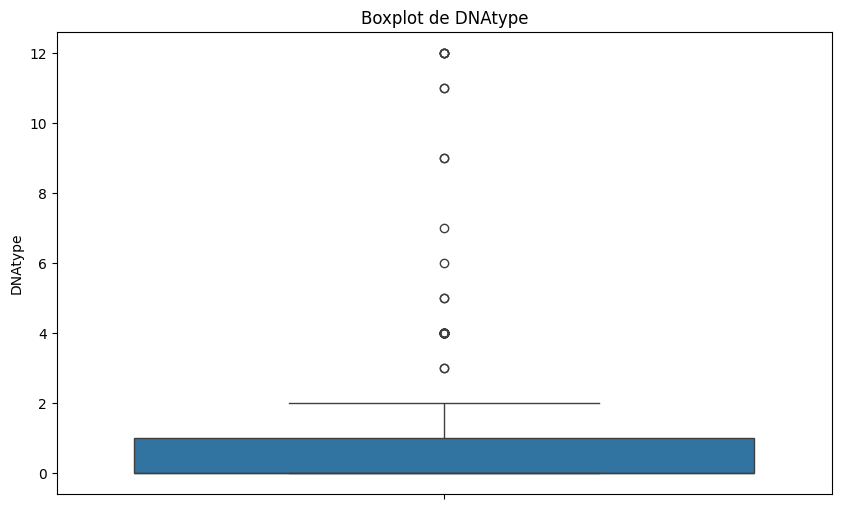

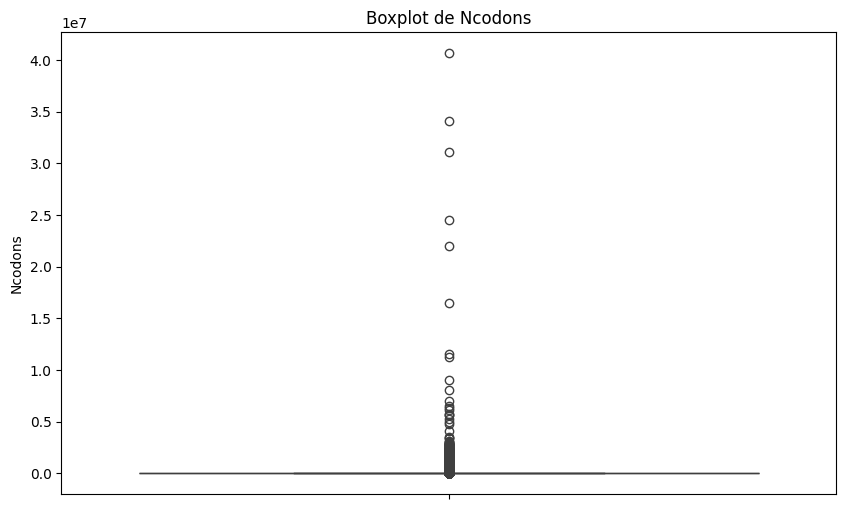

Cantidad de datos atípicos por columna:
{'DNAtype': np.int64(46), 'Ncodons': np.int64(1915)}


In [27]:
outliers_dict = {}

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  
        outliers = detectar_outliers_iqr(df[column])
        outlier_count = outliers.sum()  
        outliers_dict[column] = outlier_count  

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column])
        plt.title(f'Boxplot de {column}')
        plt.show()

print("Cantidad de datos atípicos por columna:")
print(outliers_dict)

Vemos que solo encontramos datos atípicos en la columna 'DNAtype' y 'Ncodons' sin embargo dado que DNAtype es realmete una variable categórica estos datos atípicos no son válidos en este contexto. Y en el caso de Ncodons, esto podría ser debido a que es una variable que se calcula a partir de la secuencia genética y no es un dato que podría ser erróneo o incorrecto.

C:\Users\esteb\AppData\Local\Temp\ipykernel_28904\3635286537.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


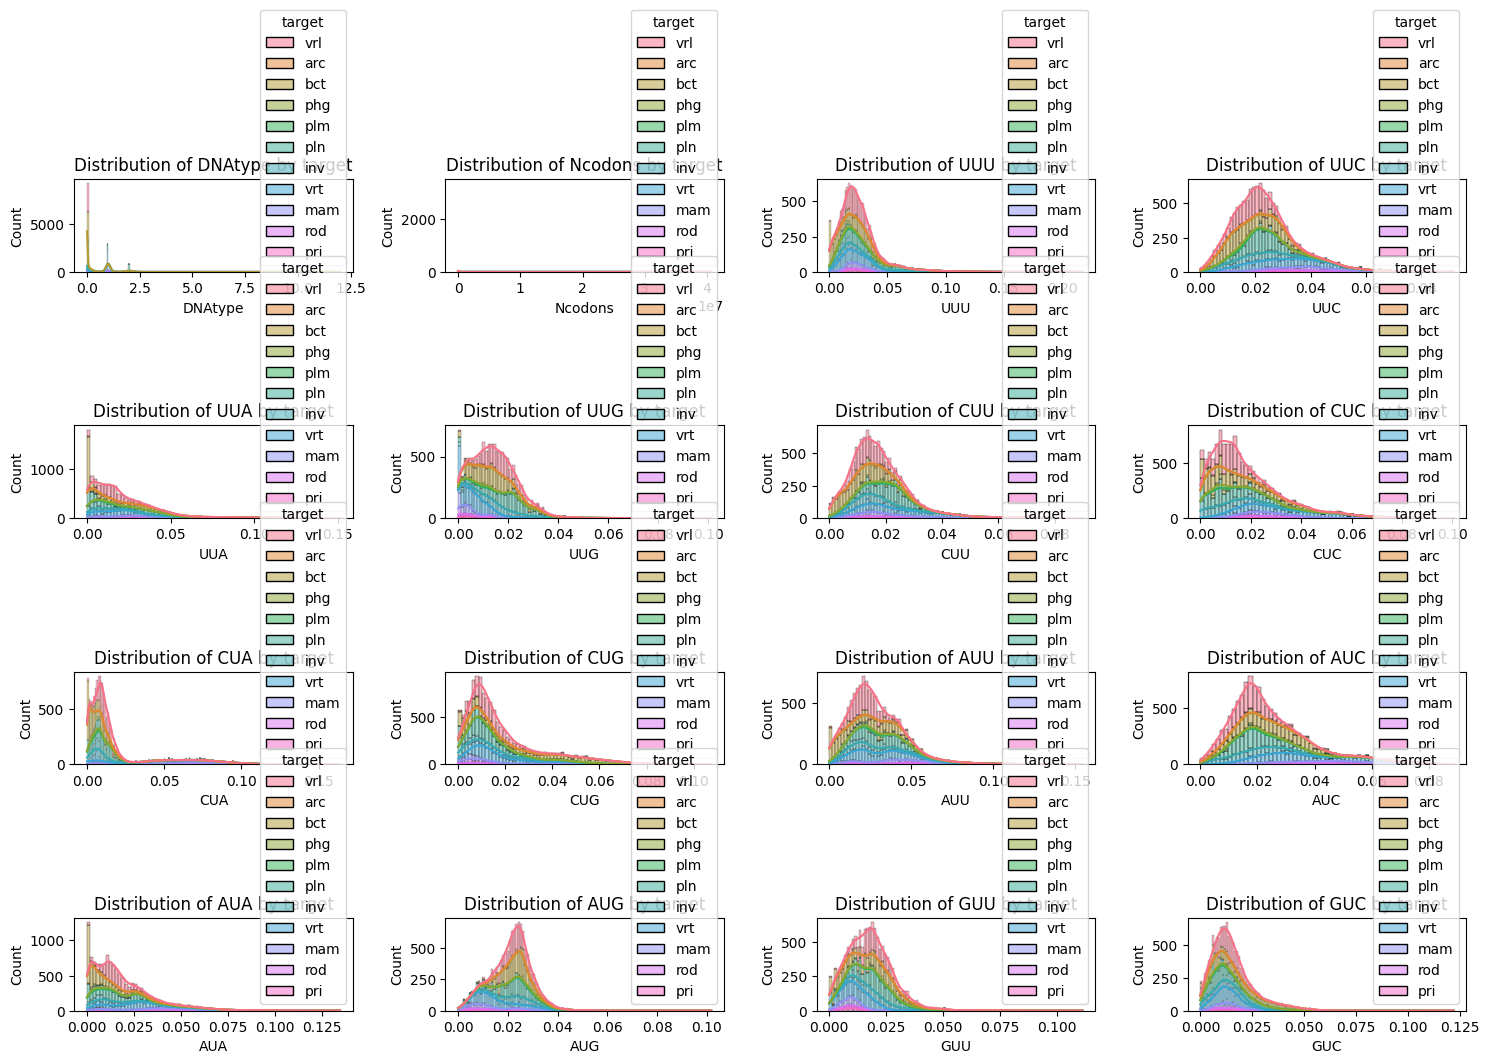

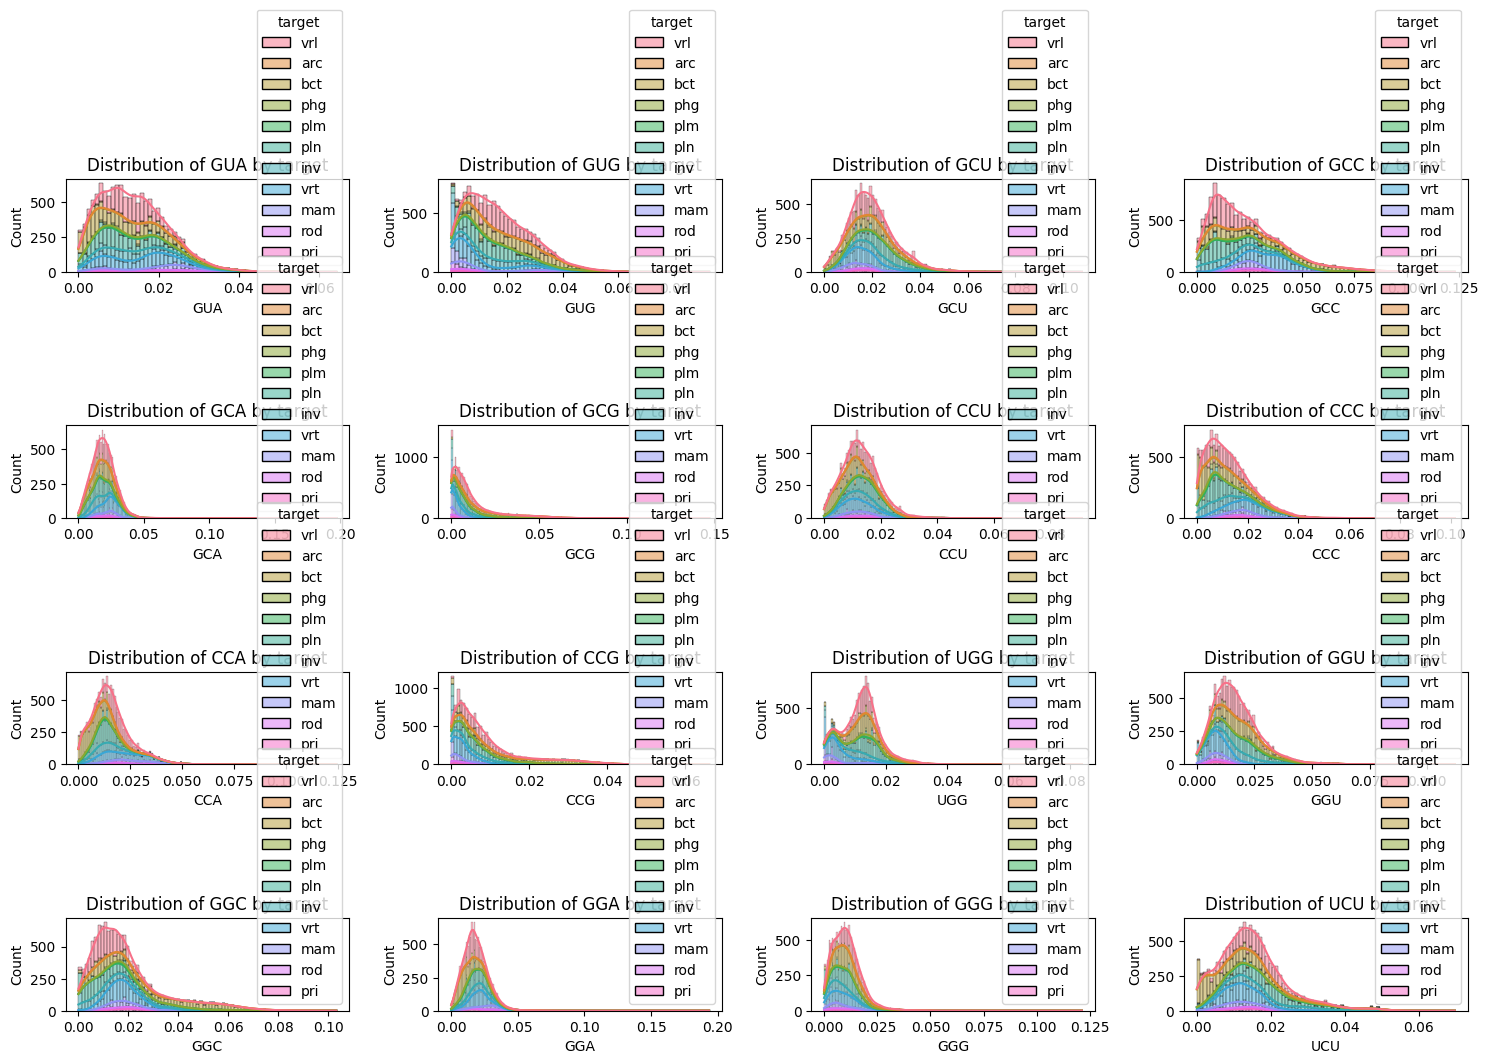

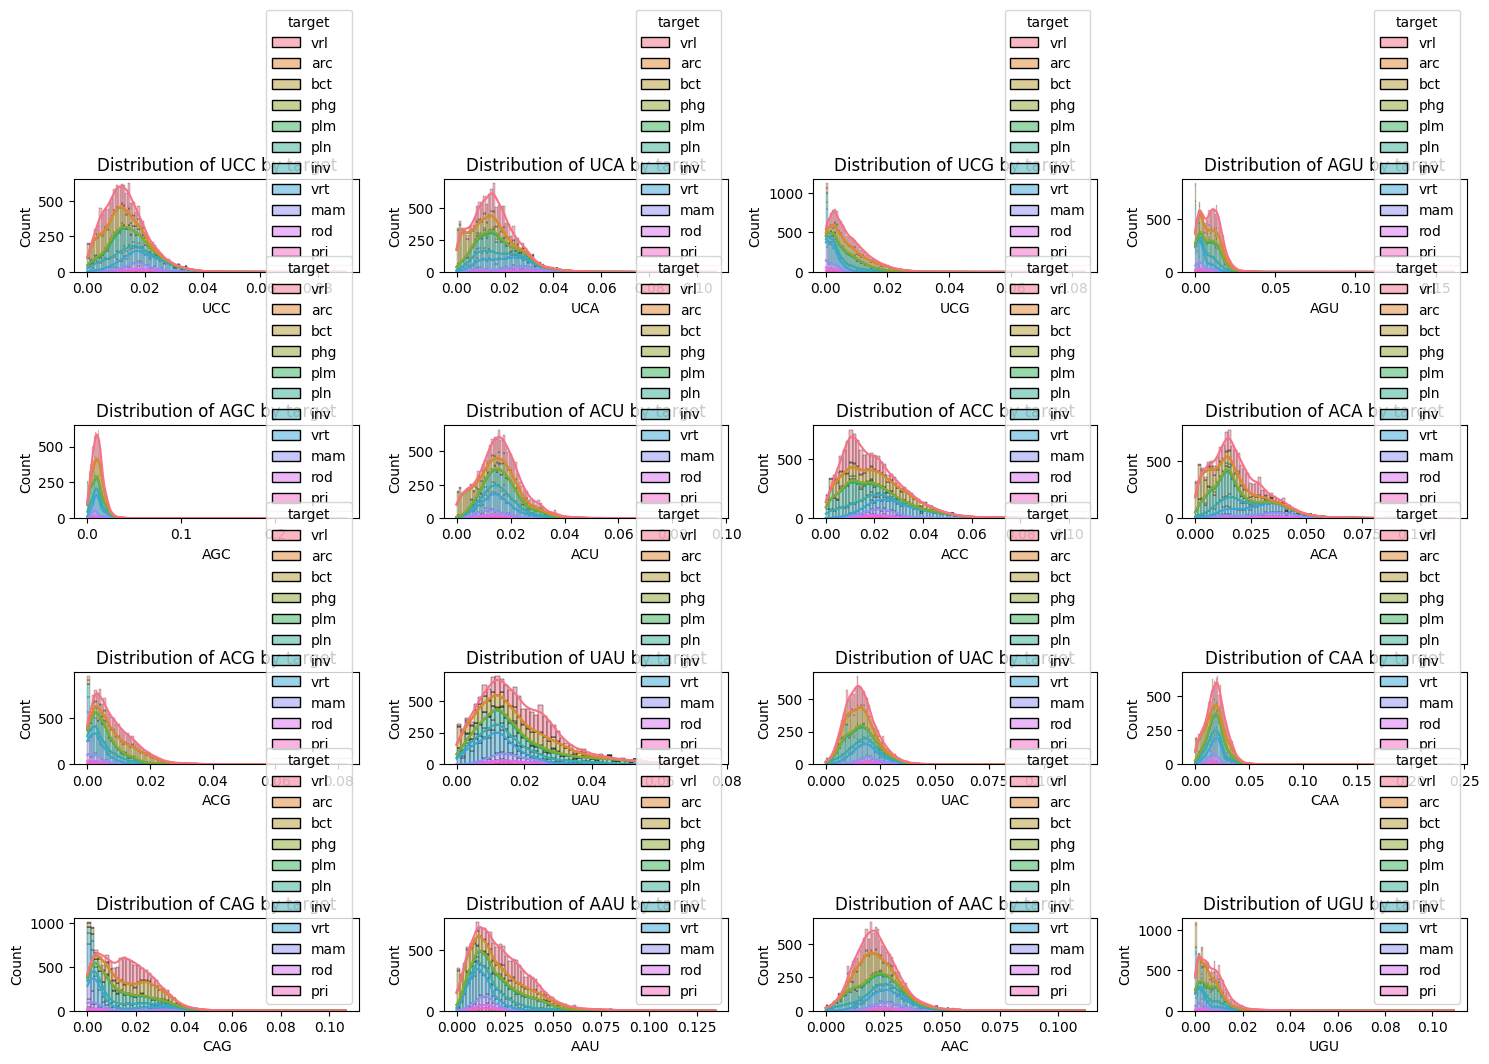

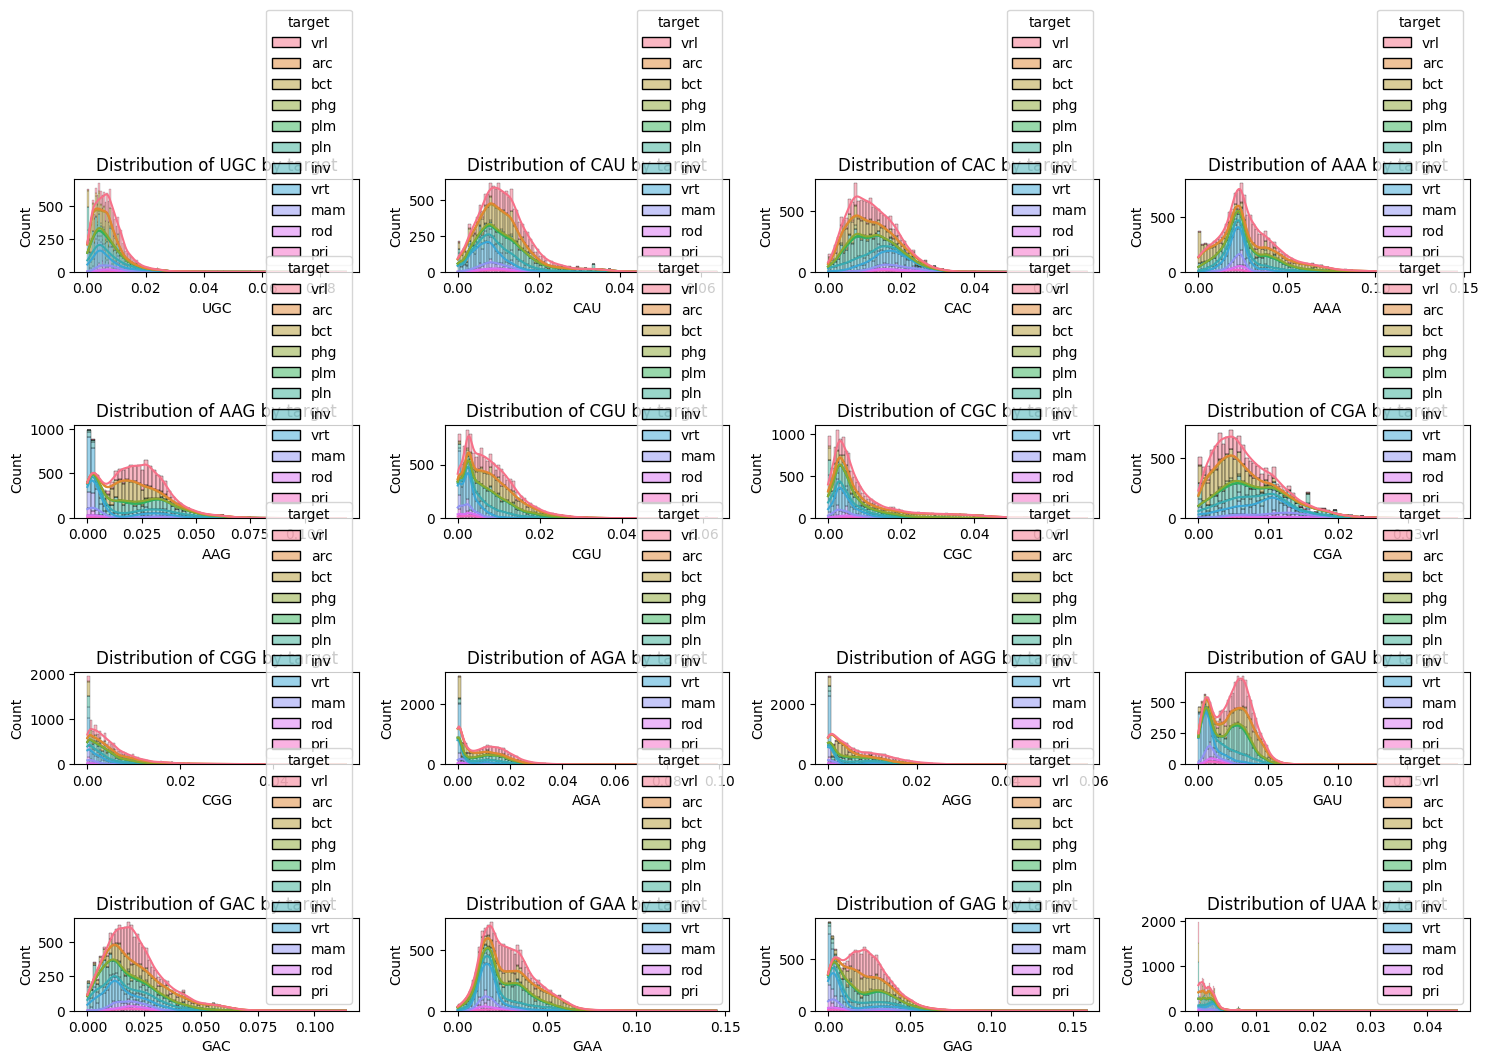

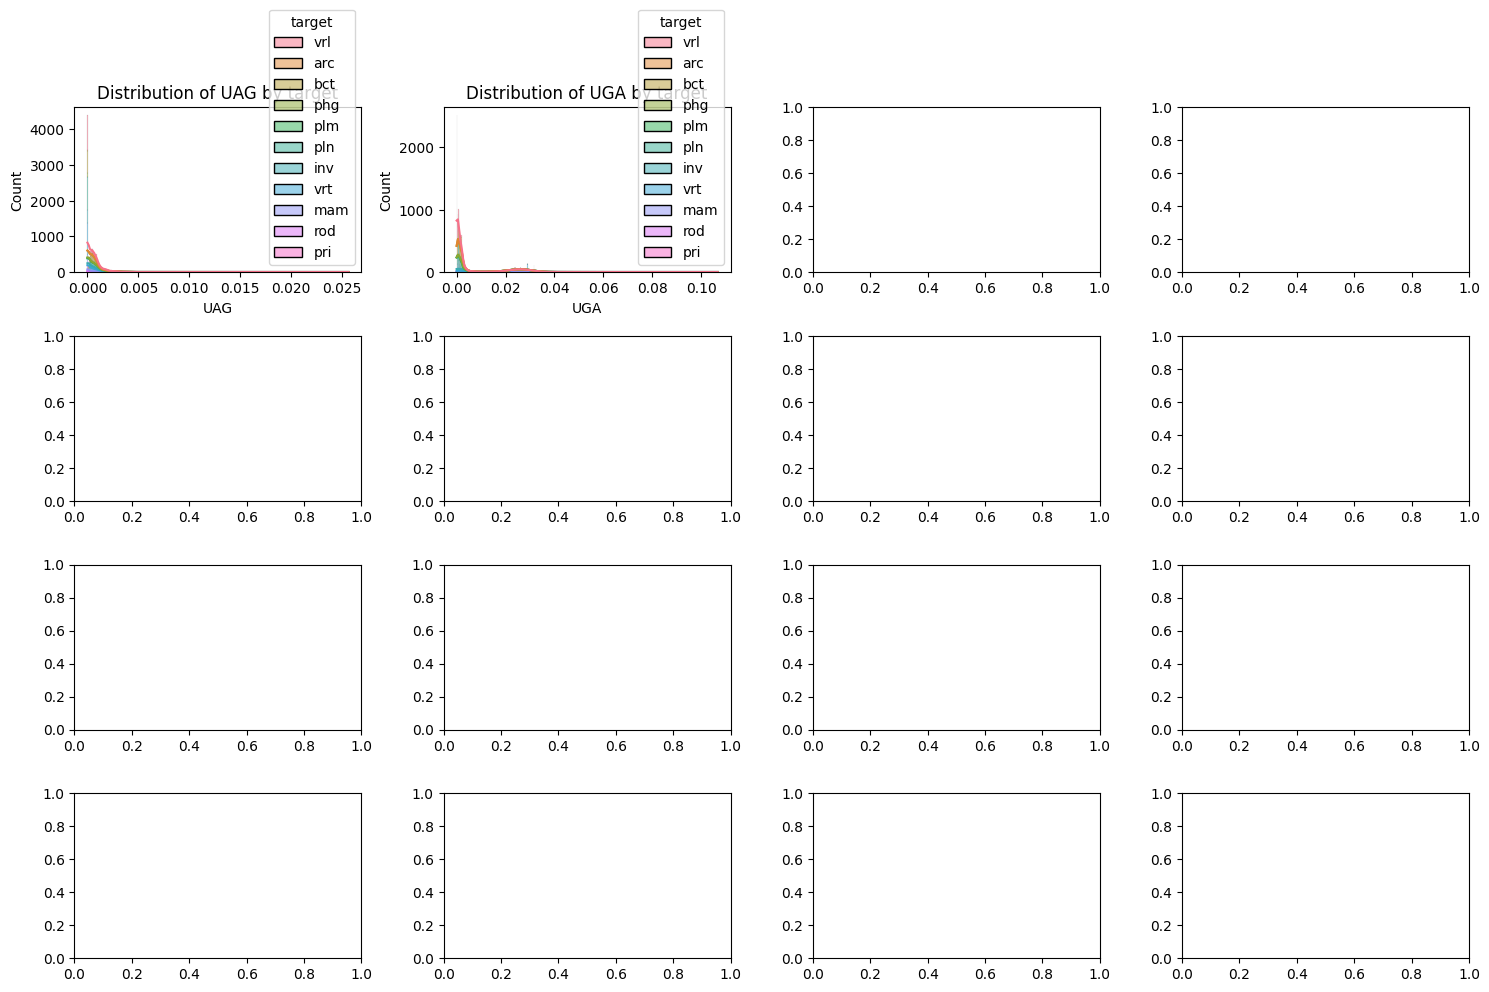

In [28]:
df_s = pd.DataFrame(X)  
df_s['target'] = y     

def plot_histograms(df_s, target_column, variables, rows=4, cols=4):
    num_plots = rows * cols
    for i in range(0, len(variables), num_plots):
        subset_vars = variables[i:i+num_plots]
        fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=False, sharey=False)
        for var, ax in zip(subset_vars, axes.flatten()):
            sns.histplot(data=df_s, x=var, hue=target_column, multiple="stack", ax=ax, kde=True)
            ax.set_title(f"Distribution of {var} by {target_column}")
        plt.tight_layout()
        plt.show()

variables = df_s.columns[:-1]  
plot_histograms(df_s, 'target', variables, rows=4, cols=4)

### **Hipotesis de Modelos**

**XGBoost :** Los algoritmos de boosting, son efectivos para datasets con alta dimensionalidad y datos atípicos, ya que mejoran el rendimiento agregando iterativamente modelos correctivos. Estos algoritmos son altamente personalizables, lo cual es útil si el dataset presenta desequilibrios o categorías complejas, como en la variable *Kingdom*. Además, son eficaces en términos de tiempo y rendimiento en comparación con otros métodos complejos.   

**Ramdom Forest :** Este modelo es adecuado para datos con una mezcla de variables categóricas y continuas y es robusto ante outliers. Random Forest maneja datos con alta dimensionalidad y tiene un mecanismo de selección de características que ayuda a identificar cuáles son más importantes. Además, puede manejar un dataset de más de 10,000 registros sin problemas de sobreajuste, ya que emplea el promedio de múltiples árboles de decisión.  

**Support Vector Machines (SVM) :** El SVM sigue siendo adecuado, especialmente usando kernels no lineales como RBF o polynomial. Los kernels no lineales pueden ayudar a capturar patrones complejos en datos de alta dimensión y alta correlación entre variables, permitiendo una separación efectiva de clases en el espacio de codones.  

**Neural Networks (MLPC) :** Dado que las redes neuronales multicapa son muy buenas para aprender patrones complejos y detectar de buena maenra la correlación entre variables, ademas de que la gran catidad de datos que tenemos nos puede ayudar a que la red aprenda de manera más eficiente.

**K-Nearest Neighbors (KNN):** KNN es eficaz para clasificar datasets con alta dimensionalidad al identificar patrones locales y comparando los datos de prueba con los de entrenamiento para realizar sus predicciones. Este modelo no crea un modelo explícito durante el entrenamiento; en su lugar, guarda todos los datos de entrenamiento y, cuando se presenta un nuevo dato, calcula la distancia entre este y los puntos de entrenamiento. Luego, selecciona los *k* puntos de entrenamiento más cercanos y asigna la clase más común entre ellos a la muestra de prueba. Esta capacidad de "comparar" los datos permite a KNN adaptarse a la distribución local de las clases, lo que puede ser útil cuando las clases están separadas de forma no lineal o tienen formas complejas. Sin embargo, KNN es sensible a los outliers, ya que estos pueden influir en la clasificación de las muestras cercanas. Además, su rendimiento puede disminuir con un número elevado de dimensiones debido al *curse of dimensionality*, que dificulta la medición de distancias significativas en espacios de alta dimensionalidad. Con una elección adecuada de *k* y la normalización de los datos, KNN puede ofrecer buenos resultados en problemas de clasificación como este dataset.

### **Metricas a Evaluar**

Se evaluarán los modelos usando 2 metricas Log-Loss y F1-Score. Esto ya que en el caso de F1-Score nos proporcionara una mejor idea del rendimiento de los modelos puesto que encontramos que las clases presentan un desbalceo en la cantidad de datos de cada clase. Y en el caso de Log-Loss nos proporcionara informacion sobre las probabilidades predichas para cada clase puesto que esto nos ayudara a ver como los modelos entienden nuestros datos.

### **Modelos**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
metrics_df = pd.DataFrame(columns=["Log Loss", "F1 Score"])

####  **XGBoost**

In [31]:
import xgboost as xgb

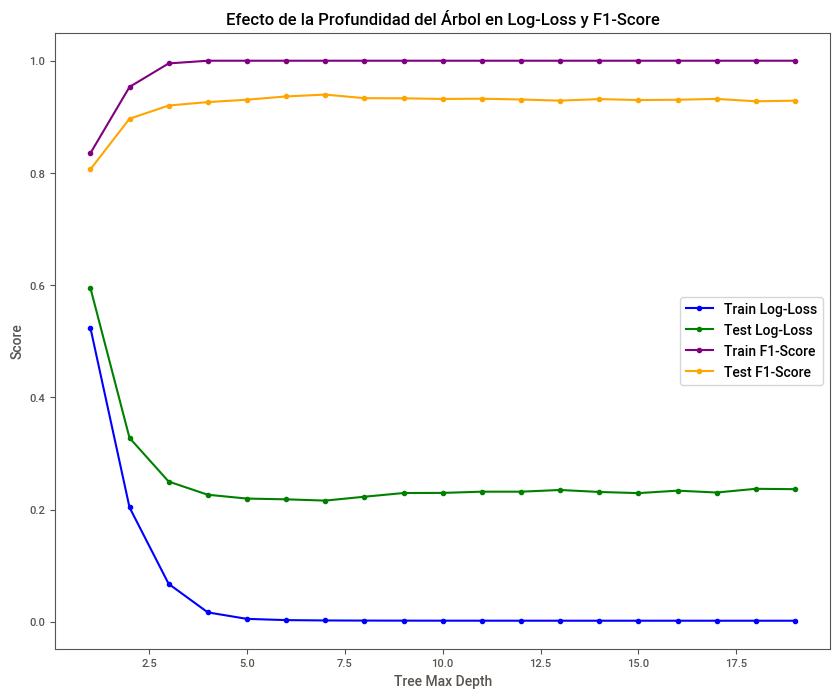

In [ ]:
max_depths = range(1, 20)

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for max_depth in max_depths:
    model = xgb.XGBClassifier(max_depth=max_depth, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(max_depths, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(max_depths, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(max_depths, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(max_depths, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Score')
plt.title('Efecto de la Profundidad del Árbol en Log-Loss y F1-Score')
plt.legend()
plt.show()

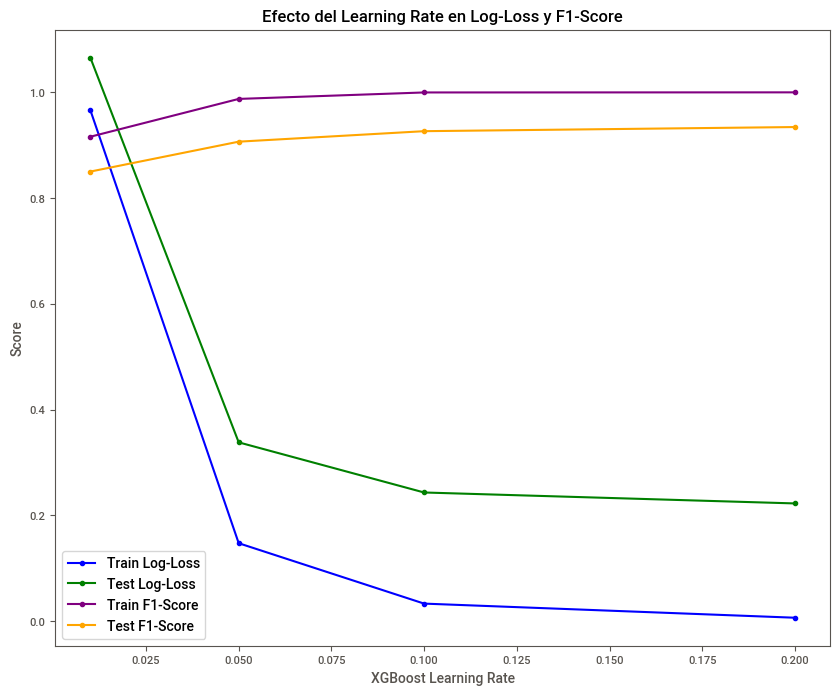

In [ ]:
learning_rates = [0.01, 0.05, 0.1, 0.2]

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

# Si tienes max_depths, también debes agregar un ciclo para ello.
for learning_rate in learning_rates:
    model = xgb.XGBClassifier(learning_rate=learning_rate, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))  

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(learning_rates, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(learning_rates, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(learning_rates, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(learning_rates, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('XGBoost Learning Rate')
plt.ylabel('Score')
plt.title('Efecto del Learning Rate en Log-Loss y F1-Score')
plt.legend()
plt.show()


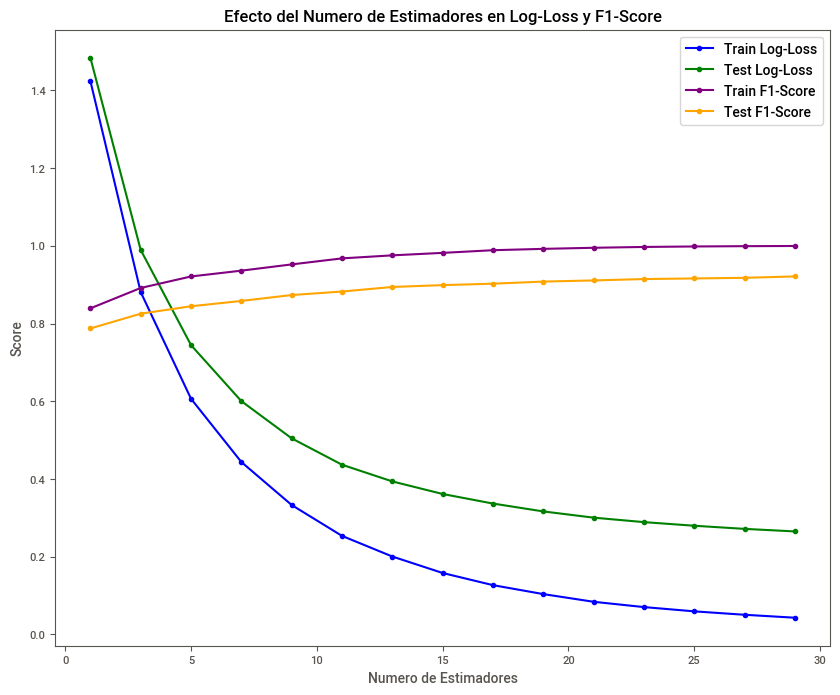

In [ ]:
n_estimators = range(1, 30, 2)

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for n_estimator in n_estimators:
    model = xgb.XGBClassifier(n_estimators = n_estimator, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))  

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(n_estimators, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(n_estimators, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(n_estimators, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(n_estimators, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Numero de Estimadores')
plt.ylabel('Score')
plt.title('Efecto del Numero de Estimadores en Log-Loss y F1-Score')
plt.legend()
plt.show()

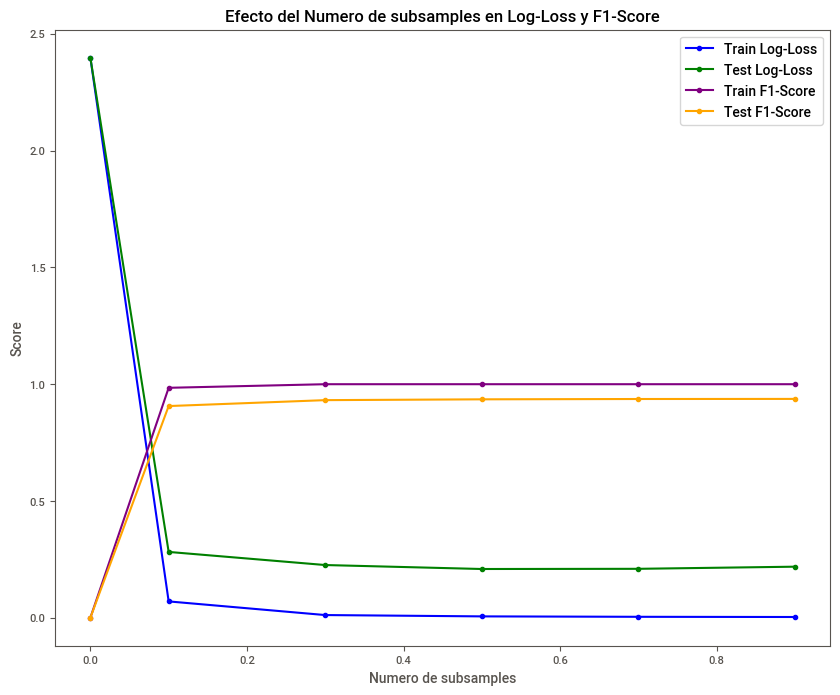

In [ ]:
subsamples = [0, 0.1, 0.3, 0.5, 0.7, 0.9]

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for subsample in subsamples:
    model = xgb.XGBClassifier(subsample = subsample, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))  

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(subsamples, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(subsamples, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(subsamples, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(subsamples, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Numero de subsamples')
plt.ylabel('Score')
plt.title('Efecto del Numero de subsamples en Log-Loss y F1-Score')
plt.legend()
plt.show()

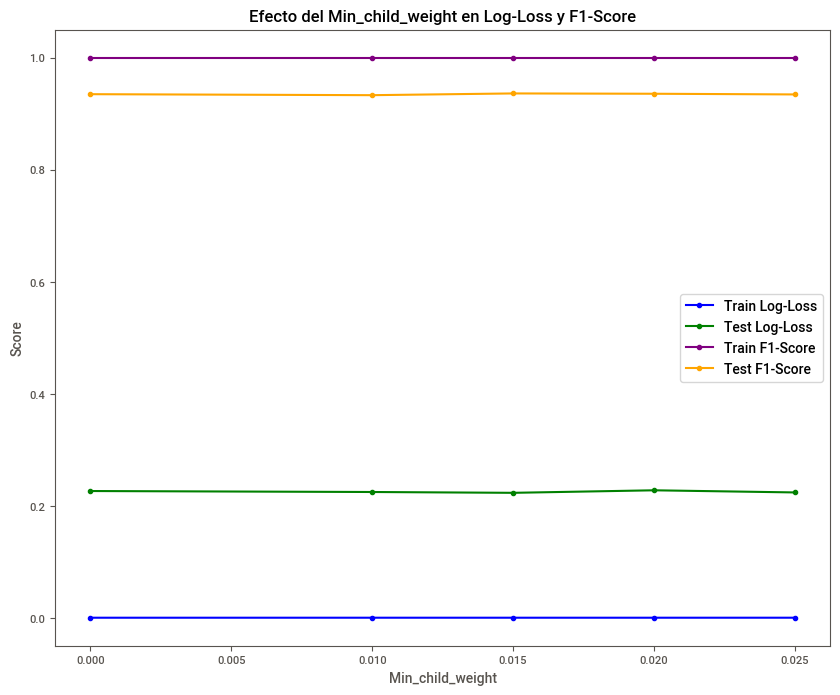

In [ ]:
min_child_weights = [0,0.01,0.015,0.020,0.025]

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for min_child_weight in min_child_weights:
    model = xgb.XGBClassifier(min_child_weight = min_child_weight, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))  

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(min_child_weights, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(min_child_weights, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(min_child_weights, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(min_child_weights, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Min_child_weight')
plt.ylabel('Score')
plt.title('Efecto del Min_child_weight en Log-Loss y F1-Score')
plt.legend()
plt.show()

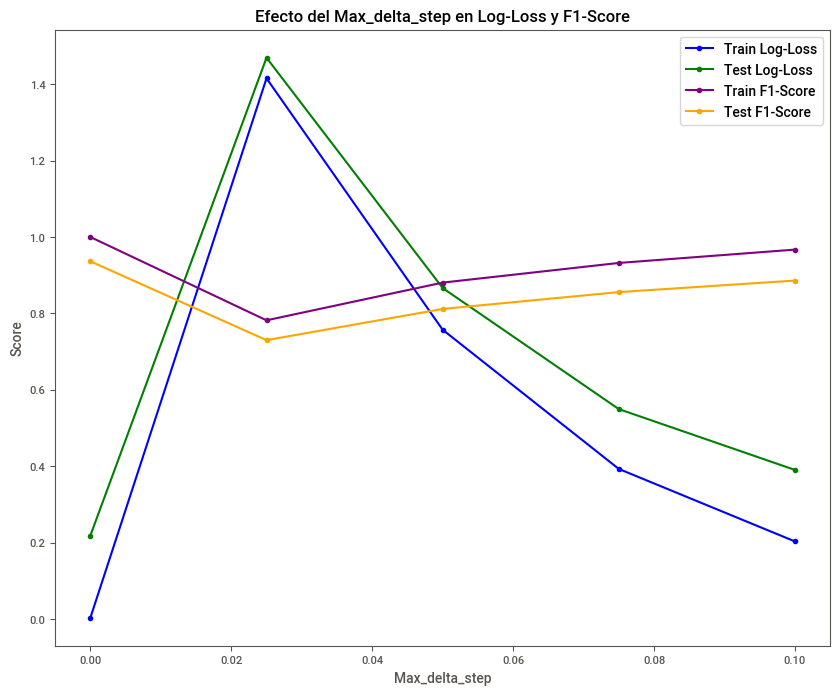

In [ ]:
max_delta_steps = [0,0.025,0.05,0.075,0.1]

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for max_delta_step in max_delta_steps:
    model = xgb.XGBClassifier(max_delta_step = max_delta_step, eval_metric='mlogloss')
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))
    
    # Log-loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))  

# Graficamos el rendimiento
plt.figure(figsize=(10, 8))
plt.plot(max_delta_steps, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(max_delta_steps, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(max_delta_steps, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(max_delta_steps, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Max_delta_step')
plt.ylabel('Score')
plt.title('Efecto del Max_delta_step en Log-Loss y F1-Score')
plt.legend()
plt.show()

In [ ]:
model = xgb.XGBClassifier(verbosity = 0,
                          min_child_weight = 1)

In [ ]:
gs_f1 = GridSearchCV(model,
                     param_grid={
                         'learning_rate' : [0.02,0.03,0.025,0.035],
                         'max_depth': [1,2,3], 
                         'subsample': [0.01,0.05,0.025,0.075], 
                         'n_estimators': range(4, 6, 1)
                     },
                     cv=5,
                     scoring='f1_weighted')  # Usar F1-score ponderado

# Entrenamiento
gs_f1.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (F1-score):", gs_f1.best_params_)
print("Best F1-weighted score:", gs_f1.best_score_)

Best parameters (F1-score): {'learning_rate': 0.035, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.075}
Best F1-weighted score: 0.6887562867445733


In [ ]:
# Configuración de Grid Search con Log-Loss
gs_logloss = GridSearchCV(model,
                          param_grid={
                         'learning_rate' : [0.02,0.03,0.025,0.035],
                         'max_depth': [1,2,3], 
                         'subsample': [0.01,0.05,0.025,0.075], 
                         'n_estimators': range(4, 6, 1)
                          },
                          cv=5,
                          scoring='neg_log_loss')  # Usar log-loss negativo

# Entrenamiento
gs_logloss.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (Log-Loss):", gs_logloss.best_params_)
print("Best Log-Loss (negative):", gs_logloss.best_score_)  # Convertir a positivo


Best parameters (Log-Loss): {'learning_rate': 0.035, 'max_depth': 3, 'n_estimators': 5, 'subsample': 0.075}
Best Log-Loss (negative): -2.050279234026752


In [32]:
#crear modelo usando parámetros óptimos
XGB_model_f1 = xgb.XGBClassifier(n_estimators=5,
                               subsample = 0.075,
                               learning_rate = 0.03,
                               max_depth=3,
                               verbosity=0)
#Entrenamiento
XGB_model_f1.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
#crear modelo usando parámetros óptimos
XGB_model_Logloss = xgb.XGBClassifier(n_estimators=5,
                               subsample = 0.075,
                               learning_rate = 0.035,
                               max_depth=3,
                               verbosity=0)
#Entrenamiento
XGB_model_Logloss.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
y_pred_f1 = XGB_model_f1.predict(X_test)
f1 = f1_score(y_test_encoded,y_pred_f1,average='weighted')

In [35]:
y_pred_Logloss = XGB_model_Logloss.predict_proba(X_test)
Logloss = log_loss(y_test_encoded, y_pred_Logloss)

In [36]:
print('f1\t Logloss\n %0.3f\t %0.3f'%(f1,Logloss))

f1	 Logloss
 0.689	 2.044


In [37]:
metrics_df.loc['XGBoost'] = [Logloss, f1]

Text(0.5, 1.0, 'Matriz de Confusión')

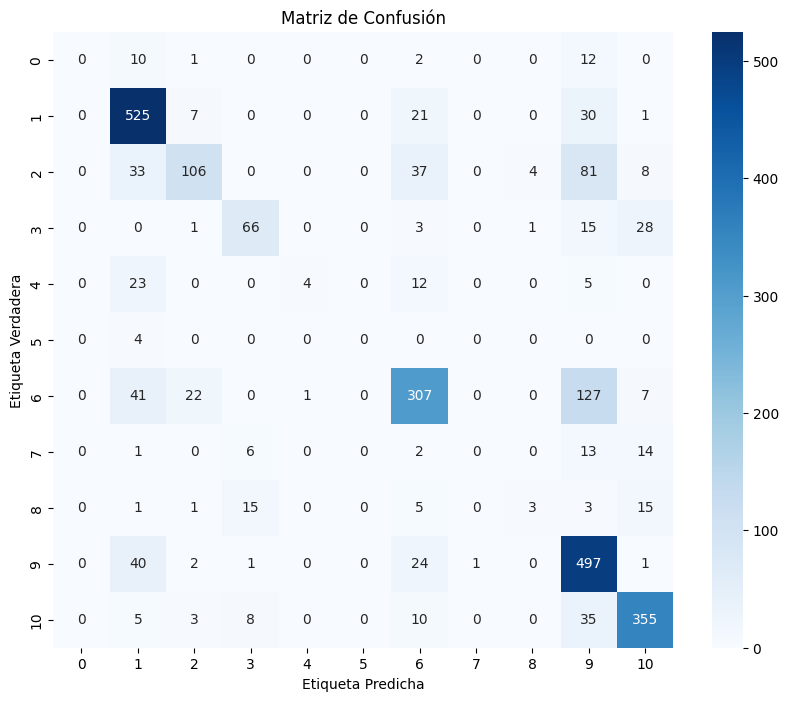

In [38]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_f1)

# Visualización con etiquetas de clase
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

In [39]:
category_counts = pd.Series(y_test_encoded).value_counts().sort_index()

# Calcular las predicciones correctas e incorrectas
correct_predictions = pd.Series([y_test_encoded[i] == y_pred_f1[i] for i in range(len(y_test_encoded))])
correct_counts = pd.Series(y_test_encoded[correct_predictions]).value_counts().sort_index()
incorrect_counts = category_counts - correct_counts

# Crear el DataFrame final
results_df = pd.DataFrame({
    'Total': category_counts,
    'Correctas': correct_counts,
    'Incorrectas': incorrect_counts
}).fillna(0).astype(int)

print(results_df)

    Total  Correctas  Incorrectas
0      25          0            0
1     584        525           59
2     269        106          163
3     114         66           48
4      44          4           40
5       4          0            0
6     505        307          198
7      36          0            0
8      43          3           40
9     566        497           69
10    416        355           61


#### **Random Forest**

In [40]:
from sklearn.ensemble import RandomForestClassifier

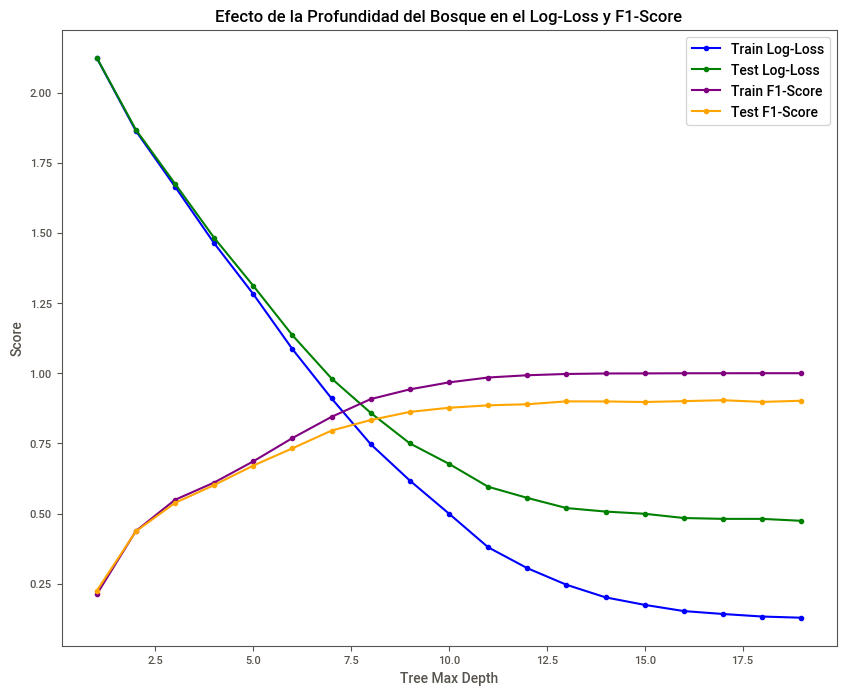

In [ ]:
#graficamos la profundidad vs el accuracy
max_depths = range(1, 20)
train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for max_depth in max_depths:
    tree_clas = RandomForestClassifier(max_depth=max_depth, class_weight="balanced")
    tree_clas.fit(X_train, y_train_encoded)

    train_pred = tree_clas.predict(X_train)
    test_pred = tree_clas.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))

    train_proba = tree_clas.predict_proba(X_train)
    test_proba = tree_clas.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(max_depths, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(max_depths, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(max_depths, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(max_depths, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Score')
plt.title('Efecto de la Profundidad del Bosque en el Log-Loss y F1-Score')
plt.legend()
plt.show()

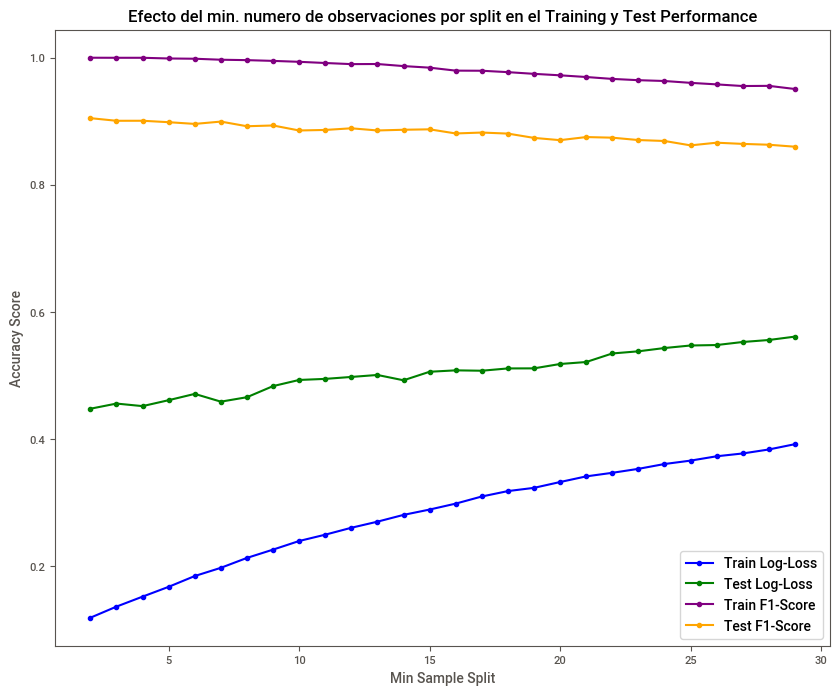

In [ ]:
#graficamos el min_sample_split vs el accuracy
min_samples_splits = range(2, 30)
train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []


for min_samples_split in min_samples_splits:
    tree_clas = RandomForestClassifier(min_samples_split=min_samples_split)
    tree_clas.fit(X_train, y_train_encoded)
    
    train_pred = tree_clas.predict(X_train)
    test_pred = tree_clas.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))

    train_proba = tree_clas.predict_proba(X_train)
    test_proba = tree_clas.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(min_samples_splits, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(min_samples_splits, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(min_samples_splits, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(min_samples_splits, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

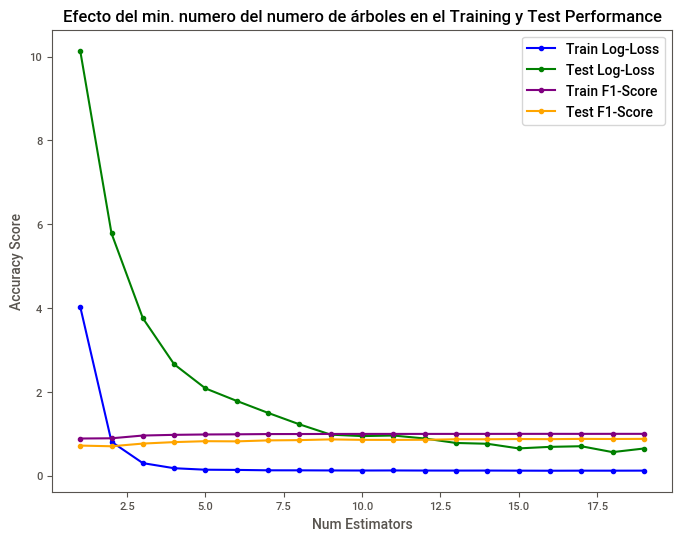

In [ ]:
#graficamos el n_estimators vs el accuracy
n_estimators = range(1, 20)
train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for n_estimator in n_estimators:
    tree_clas = RandomForestClassifier(n_estimators=n_estimator)
    tree_clas.fit(X_train, y_train_encoded)
    
    train_pred = tree_clas.predict(X_train)
    test_pred = tree_clas.predict(X_test)
    train_f1_scores.append(f1_score(y_train_encoded, train_pred, average='weighted'))
    test_f1_scores.append(f1_score(y_test_encoded, test_pred, average='weighted'))

    train_proba = tree_clas.predict_proba(X_train)
    test_proba = tree_clas.predict_proba(X_test)
    train_log_losses.append(log_loss(y_train_encoded, train_proba))
    test_log_losses.append(log_loss(y_test_encoded, test_proba))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_log_losses, label='Train Log-Loss', color='blue', marker='o')
plt.plot(n_estimators, test_log_losses, label='Test Log-Loss', color='green', marker='o')
plt.plot(n_estimators, train_f1_scores, label='Train F1-Score', color='purple', marker='o')
plt.plot(n_estimators, test_f1_scores, label='Test F1-Score', color='orange', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

In [ ]:
# Configuración del modelo
model = RandomForestClassifier(min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               verbose=0)

In [ ]:
# Configuración de Grid Search con F1 ponderado
gs_f1 = GridSearchCV(model,
                     param_grid={
                         'criterion' : ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7,8,9], 
                         'min_samples_split': range(15, 20, 1), 
                         'n_estimators': range(1, 2, 1)
                     },
                     cv=5,
                     scoring='f1_weighted')  # Usar F1-score ponderado

# Entrenamiento
gs_f1.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (F1-score):", gs_f1.best_params_)
print("Best F1-weighted score:", gs_f1.best_score_)


Best parameters (F1-score): {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 17, 'n_estimators': 1}
Best F1-weighted score: 0.6841407005866551


In [ ]:
# Configuración de Grid Search con Log-Loss
gs_logloss = GridSearchCV(model,
                          param_grid={
                         'criterion' : ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7,8,9], 
                         'min_samples_split': range(15, 20, 1), 
                         'n_estimators': range(1, 2, 1)
                          },
                          cv=5,
                          scoring='neg_log_loss')  # Usar log-loss negativo

# Entrenamiento
gs_logloss.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (Log-Loss):", gs_logloss.best_params_)
print("Best Log-Loss (negative):", -gs_logloss.best_score_)  # Convertir a positivo


Best parameters (Log-Loss): {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 17, 'n_estimators': 1}
Best Log-Loss (negative): 1.6901878924282498


In [41]:
#crear modelo usando parámetros óptimos
RTC_model_f1 = RandomForestClassifier(n_estimators=1,
                               criterion='entropy',
                               max_depth=9,
                               min_samples_split=19,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               verbose=0)
#Entrenamiento
RTC_model_f1.fit(X_train, y_train_encoded)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=19, n_estimators=1)

In [42]:
RTC_model_Logloss = RandomForestClassifier(n_estimators=1,
                               criterion='gini',
                               max_depth=7,
                               min_samples_split=16,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               verbose=0)
#Entrenamiento
RTC_model_Logloss.fit(X_train, y_train_encoded)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=16,
                       n_estimators=1)

In [43]:
# Evaluacion del modelo
y_pred_f1 = RTC_model_f1.predict(X_test)
f1 = f1_score(y_test_encoded,y_pred_f1,average='weighted')

In [44]:
y_pred_Logloss = RTC_model_Logloss.predict_proba(X_test)
Logloss = log_loss(y_test_encoded, y_pred_Logloss)

In [45]:
print('f1\t Logloss\n %0.3f\t %0.3f'%(f1,Logloss))

f1	 Logloss
 0.681	 1.523


In [46]:
metrics_df.loc['RandomForest'] = [Logloss, f1]

Text(0.5, 1.0, 'Matriz de Confusión')

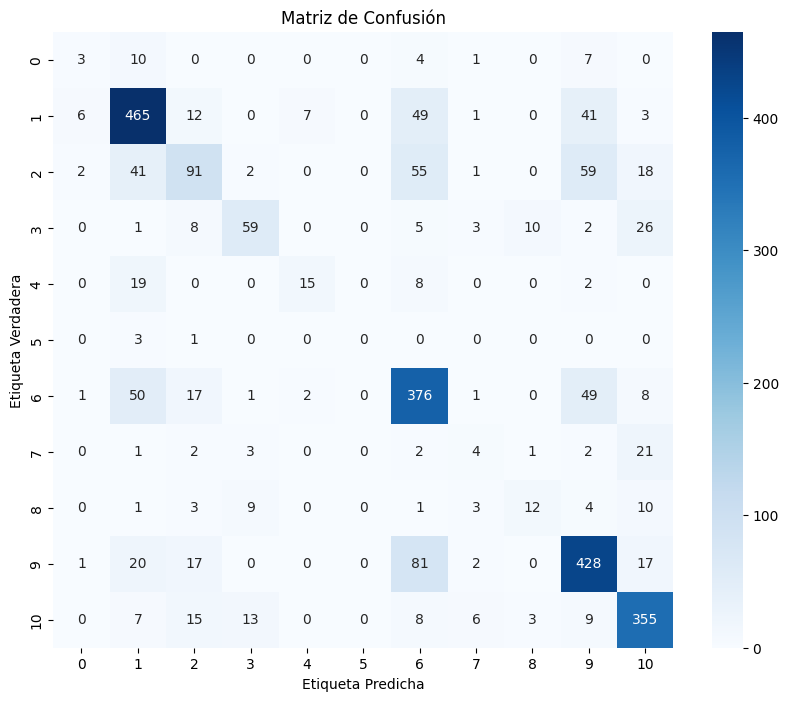

In [47]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_f1)

# Visualización con etiquetas de clase
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

In [48]:
# Contar los datos en cada categoría
category_counts = pd.Series(y_test_encoded).value_counts().sort_index()

# Calcular las predicciones correctas e incorrectas
correct_predictions = pd.Series([y_test_encoded[i] == y_pred_f1[i] for i in range(len(y_test_encoded))])
correct_counts = pd.Series(y_test_encoded[correct_predictions]).value_counts().sort_index()
incorrect_counts = category_counts - correct_counts

# Crear el DataFrame final
results_df = pd.DataFrame({
    'Total': category_counts,
    'Correctas': correct_counts,
    'Incorrectas': incorrect_counts
}).fillna(0).astype(int)

print(results_df)


    Total  Correctas  Incorrectas
0      25          3           22
1     584        465          119
2     269         91          178
3     114         59           55
4      44         15           29
5       4          0            0
6     505        376          129
7      36          4           32
8      43         12           31
9     566        428          138
10    416        355           61


#### **Support Vector Classification (SVC)**

In [49]:
from sklearn.svm import SVC

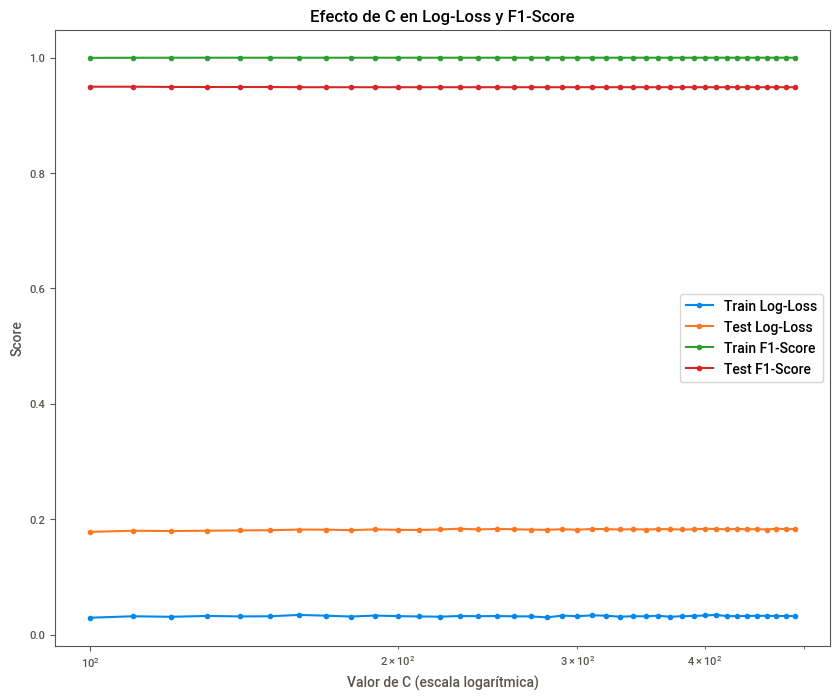

In [ ]:
C_values = range(100, 500, 10)  # Valores de 0.01 a 100

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for C in C_values:
    svc_clf = SVC(C=C, kernel='rbf', probability=True)
    svc_clf.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train)
    test_pred = svc_clf.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = svc_clf.predict_proba(X_train)
    test_proba = svc_clf.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)  
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(C_values, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(C_values, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(C_values, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(C_values, test_f1_scores, label='Test F1-Score', marker='o')
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)')
plt.ylabel('Score')
plt.title('Efecto de C en Log-Loss y F1-Score')
plt.legend()
plt.show()


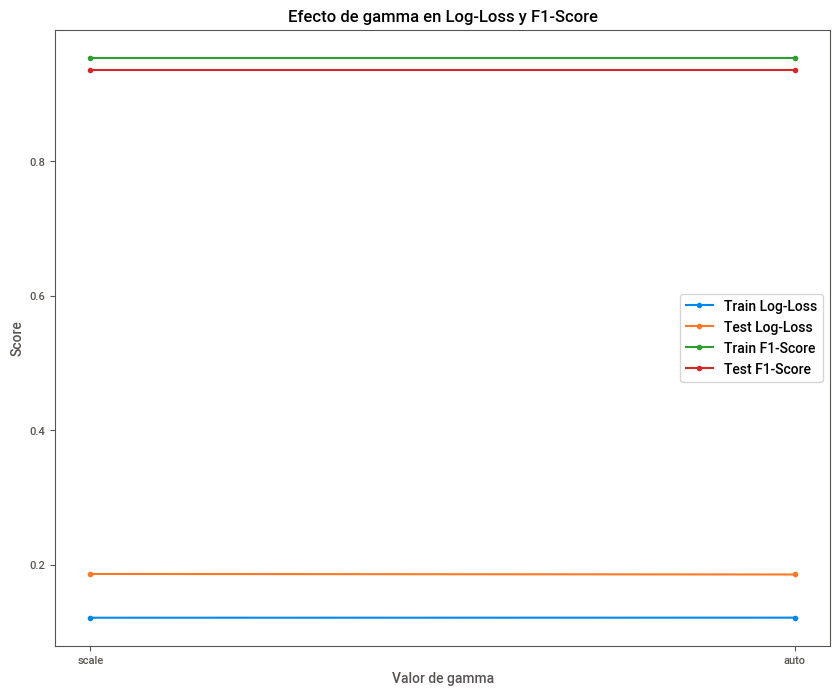

In [ ]:
gammas = ['scale', 'auto']  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for gamma in gammas:
    svc_clf = SVC(gamma=gamma, kernel='rbf', probability=True)
    svc_clf.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train)
    test_pred = svc_clf.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = svc_clf.predict_proba(X_train)
    test_proba = svc_clf.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(gammas, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(gammas, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(gammas, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(gammas, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Valor de gamma')
plt.ylabel('Score')
plt.title('Efecto de gamma en Log-Loss y F1-Score')
plt.legend()
plt.show()

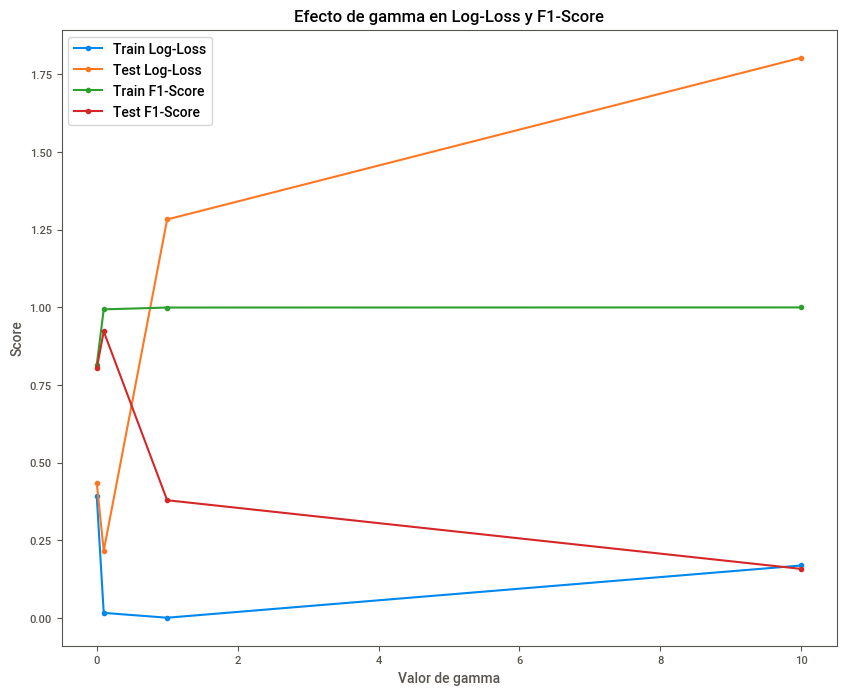

In [ ]:
gammas = [0.001, 0.1, 1,10]  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for gamma in gammas:
    svc_clf = SVC(gamma=gamma, kernel='rbf', probability=True)
    svc_clf.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = svc_clf.predict(X_train)
    test_pred = svc_clf.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = svc_clf.predict_proba(X_train)
    test_proba = svc_clf.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(gammas, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(gammas, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(gammas, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(gammas, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Valor de gamma')
plt.ylabel('Score')
plt.title('Efecto de gamma en Log-Loss y F1-Score')
plt.legend()
plt.show()

In [ ]:
model = SVC(gamma='auto', 
            kernel='rbf',
            break_ties = True, 
            probability=True)

In [ ]:
gs_f1 = GridSearchCV(model,
                     param_grid={
                         'C' : [0.02,0.03,0.025],
                         'gamma' : [1,'auto', 'scale'],
                     },
                     cv=5,
                     scoring='f1_weighted')  # Usar F1-score ponderado

# Entrenamiento
gs_f1.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (F1-score):", gs_f1.best_params_)
print("Best F1-weighted score:", gs_f1.best_score_)

Best parameters (F1-score): {'C': 0.03, 'gamma': 'scale'}
Best F1-weighted score: 0.6944082318858207


In [ ]:
# Configuración de Grid Search con Log-Loss
gs_logloss = GridSearchCV(model,
                          param_grid={
                         'C' : [0.02,0.03,0.025],
                         'gamma' : [1,'auto', 'scale'],
                         },
                          cv=5,
                          scoring='neg_log_loss')  # Usar log-loss negativo

# Entrenamiento
gs_logloss.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (Log-Loss):", gs_logloss.best_params_)
print("Best Log-Loss (negative):", gs_logloss.best_score_)  # Convertir a positivo


Best parameters (Log-Loss): {'C': 0.03, 'gamma': 'scale'}
Best Log-Loss (negative): -0.4993849034444479


In [50]:
#crear modelo usando parámetros óptimos
SVC_model_f1 = SVC(C= 0.03,
                gamma='auto', 
                kernel='rbf',
                break_ties = True, 
                probability=True)
#Entrenamiento
SVC_model_f1.fit(X_train, y_train_encoded)

SVC(C=0.03, break_ties=True, gamma='auto', probability=True)

In [51]:
SVC_model_Logloss = SVC(C= 0.03,
                gamma='auto', 
                kernel='rbf',
                break_ties = True, 
                probability=True)
#Entrenamiento
SVC_model_Logloss.fit(X_train, y_train_encoded)

SVC(C=0.03, break_ties=True, gamma='auto', probability=True)

In [52]:
# Evaluacion del modelo
y_pred_f1 = SVC_model_f1.predict(X_test)
f1 = f1_score(y_test_encoded,y_pred_f1,average='weighted')

In [53]:
y_pred_Logloss = SVC_model_Logloss.predict_proba(X_test)
Logloss = log_loss(y_test, y_pred_Logloss)

In [54]:
print('f1\t Logloss\n %0.3f\t %0.3f'%(f1,Logloss))

f1	 Logloss
 0.741	 0.461


In [55]:
metrics_df.loc['SVC'] = [Logloss, f1]

Text(0.5, 1.0, 'Matriz de Confusión')

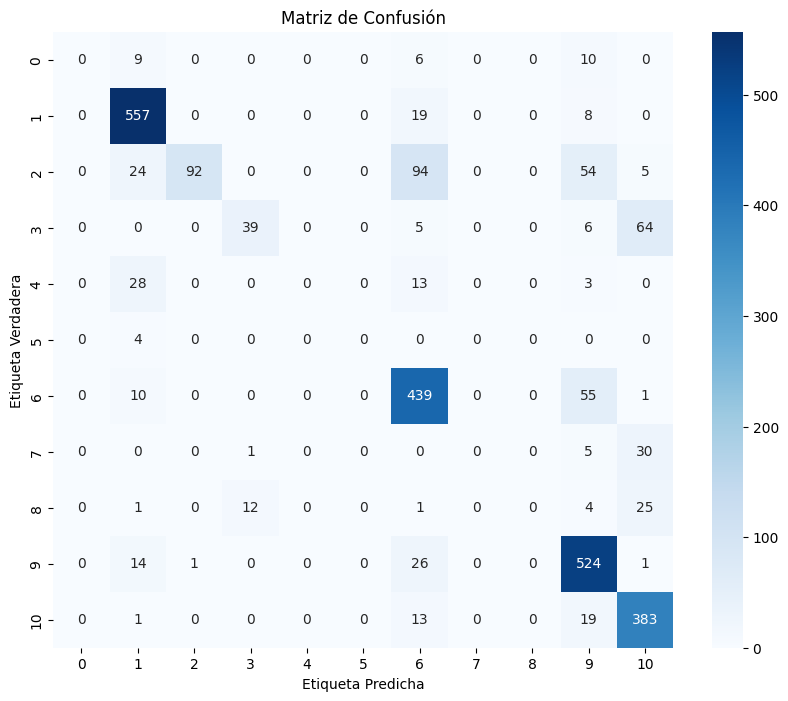

In [56]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_f1)

# Visualización con etiquetas de clase
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

In [57]:
# Contar los datos en cada categoría
category_counts = pd.Series(y_test_encoded).value_counts().sort_index()

# Calcular las predicciones correctas e incorrectas
correct_predictions = pd.Series([y_test_encoded[i] == y_pred_f1[i] for i in range(len(y_test_encoded))])
correct_counts = pd.Series(y_test_encoded[correct_predictions]).value_counts().sort_index()
incorrect_counts = category_counts - correct_counts

# Crear el DataFrame final
results_df = pd.DataFrame({
    'Total': category_counts,
    'Correctas': correct_counts,
    'Incorrectas': incorrect_counts
}).fillna(0).astype(int)

print(results_df)

    Total  Correctas  Incorrectas
0      25          0            0
1     584        557           27
2     269         92          177
3     114         39           75
4      44          0            0
5       4          0            0
6     505        439           66
7      36          0            0
8      43          0            0
9     566        524           42
10    416        383           33


#### **Neural Networks (MLPC)**

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import F1Score

In [59]:
y_train_cat = to_categorical(y_train_encoded, num_classes=11)
y_test_cat = to_categorical(y_test_encoded, num_classes=11)

In [60]:
MLPC_model = Sequential([
    Dense(66, input_shape=(66,), activation='relu'),  

    Dense(55, activation='relu'),  
    Dense(44, activation='relu'),  
    BatchNormalization(),

    Dense(33, activation='relu'), 
    BatchNormalization(),

    Dense(22, activation='relu'),  
    Dense(11, activation='relu'),  
    BatchNormalization(),

    Dense(11, activation='softmax')  
])

c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Ajustamos la métrica de F1-Score
MLPC_model.compile(optimizer=SGD(learning_rate=0.05, momentum=0.1), 
              loss='categorical_crossentropy', 
              metrics=[F1Score(average='macro')])

In [62]:
# Entrenamos el modelo
history = MLPC_model.fit(X_train, y_train_cat,
                    epochs=50, batch_size=11,
                    validation_data=(X_test, y_test_cat),
                    )

Epoch 1/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - f1_score: 0.3321 - loss: 1.1804 - val_f1_score: 0.4328 - val_loss: 0.8134
Epoch 2/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.4727 - loss: 0.6160 - val_f1_score: 0.4879 - val_loss: 0.5647
Epoch 3/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.5267 - loss: 0.4656 - val_f1_score: 0.6336 - val_loss: 0.3602
Epoch 4/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.5968 - loss: 0.3866 - val_f1_score: 0.5775 - val_loss: 0.6659
Epoch 5/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.6333 - loss: 0.3907 - val_f1_score: 0.6465 - val_loss: 0.3447
Epoch 6/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.6683 - loss: 0.3203 - val_f1_score: 0.6738 - val_loss: 0.3461
Epoch 7/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.7032 - loss: 0.2941 - val_f1_score: 0.6921 - val_loss: 0.3455
Epoch 8/50
948/948 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.7143 - loss: 0.2821 - val_f1_score: 0.

In [63]:
# Evaluamos el modelo
test_loss, test_f1_score = MLPC_model.evaluate(X_test, y_test_cat)

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - f1_score: 0.8326 - loss: 0.2788


In [64]:
print('f1\t Logloss\n %0.3f\t %0.3f'%(test_f1_score,test_loss))

f1	 Logloss
 0.809	 0.303


In [65]:
metrics_df.loc['MLPC'] = [test_loss, test_f1_score]

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


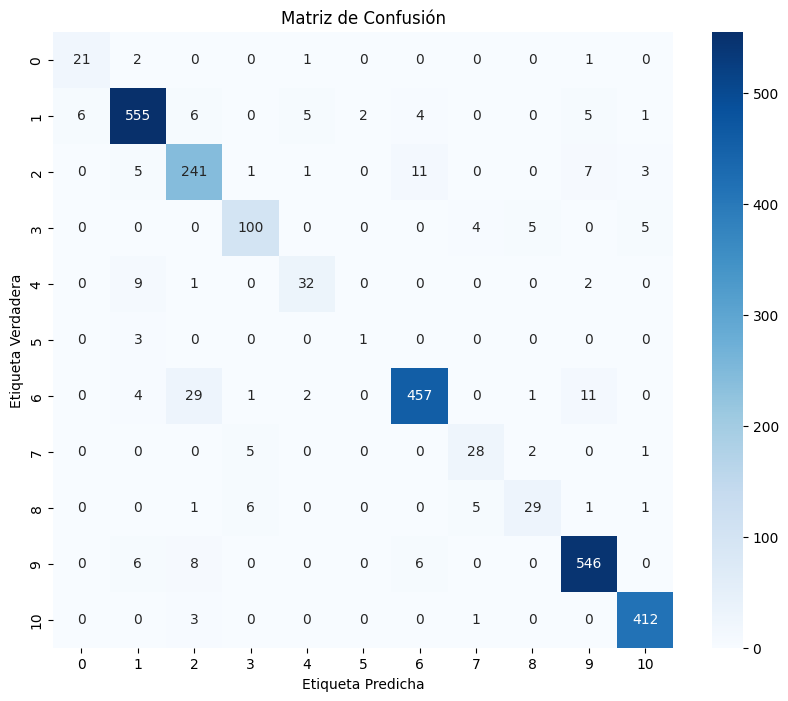

In [66]:
y_pred_prob = MLPC_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)  

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(11), yticklabels=range(11))
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [67]:
# Contar datos totales en cada categoría
category_counts = pd.Series(y_test_encoded).value_counts().sort_index()

# Calcular predicciones correctas e incorrectas
correct_predictions = (y_test_encoded == y_pred_classes)
correct_counts = pd.Series(y_test_encoded[correct_predictions]).value_counts().sort_index()
incorrect_counts = category_counts - correct_counts

# Crear el DataFrame
results_df = pd.DataFrame({
    'Total': category_counts,
    'Correctas': correct_counts,
    'Incorrectas': incorrect_counts
}).fillna(0).astype(int)

results_df

,Total,Correctas,Incorrectas
0,25,21,4
1,584,555,29
2,269,241,28
3,114,100,14
4,44,32,12
5,4,1,3
6,505,457,48
7,36,28,8
8,43,29,14
9,566,546,20


#### **KNN**

In [68]:
from sklearn.neighbors import KNeighborsClassifier

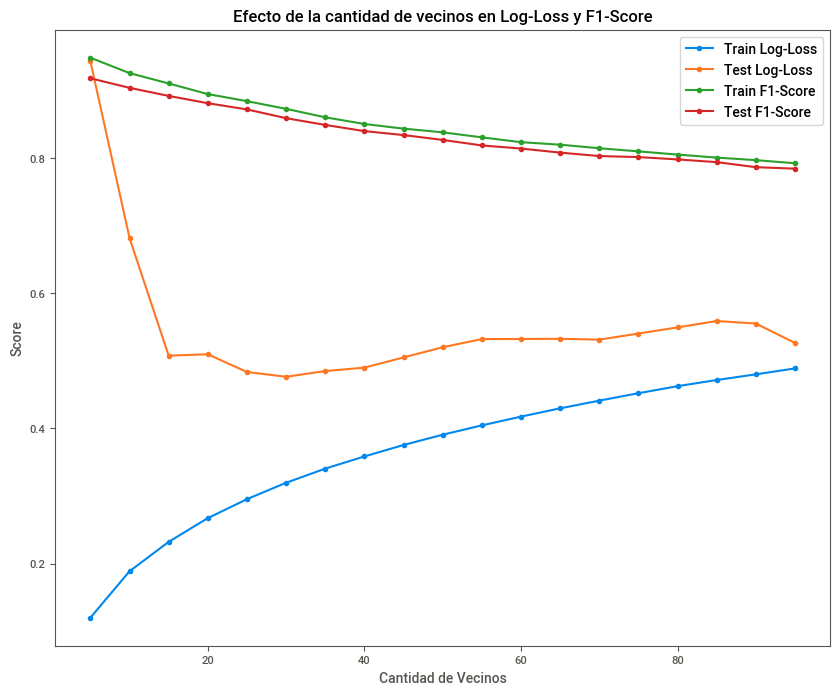

In [ ]:
# Definir el rango de valores para 
n_neighbors = range(5,100, 5)  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for n_neighbor in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n_neighbor)
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(n_neighbors, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(n_neighbors, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(n_neighbors, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(n_neighbors, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Score')
plt.title('Efecto de la cantidad de vecinos en Log-Loss y F1-Score')
plt.legend()
plt.show()

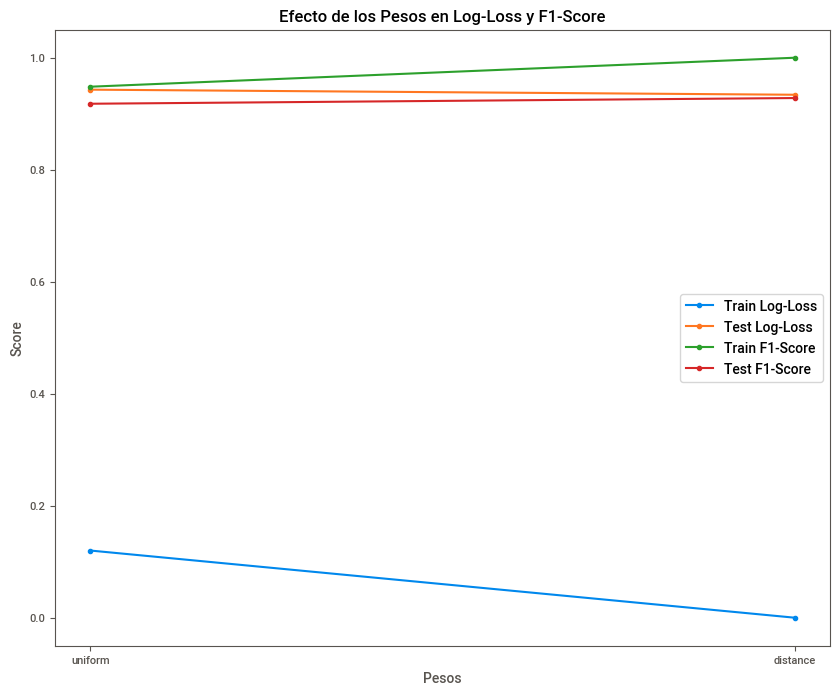

In [ ]:
# Definir el rango de valores para 
weights = ['uniform','distance']  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for weight in weights:
    model = KNeighborsClassifier(weights=weight)
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(weights, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(weights, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(weights, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(weights, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Pesos')
plt.ylabel('Score')
plt.title('Efecto de los Pesos en Log-Loss y F1-Score')
plt.legend()
plt.show()

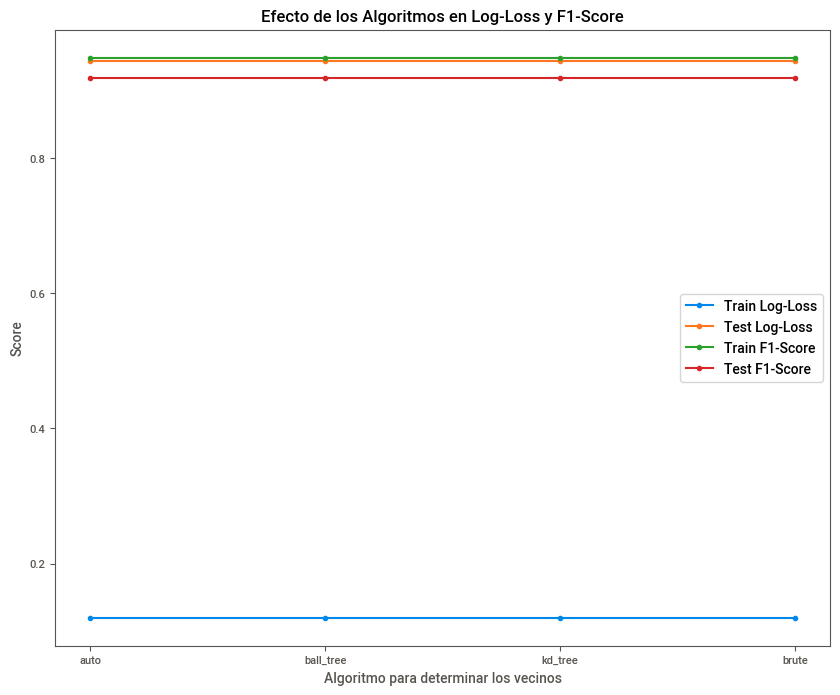

In [ ]:
# Definir el rango de valores para 
algorithms = ['auto','ball_tree','kd_tree','brute']  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for algorithm in algorithms:
    model = KNeighborsClassifier(algorithm=algorithm)
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(algorithms, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(algorithms, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(algorithms, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(algorithms, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Algoritmo para determinar los vecinos')
plt.ylabel('Score')
plt.title('Efecto de los Algoritmos en Log-Loss y F1-Score')
plt.legend()
plt.show()

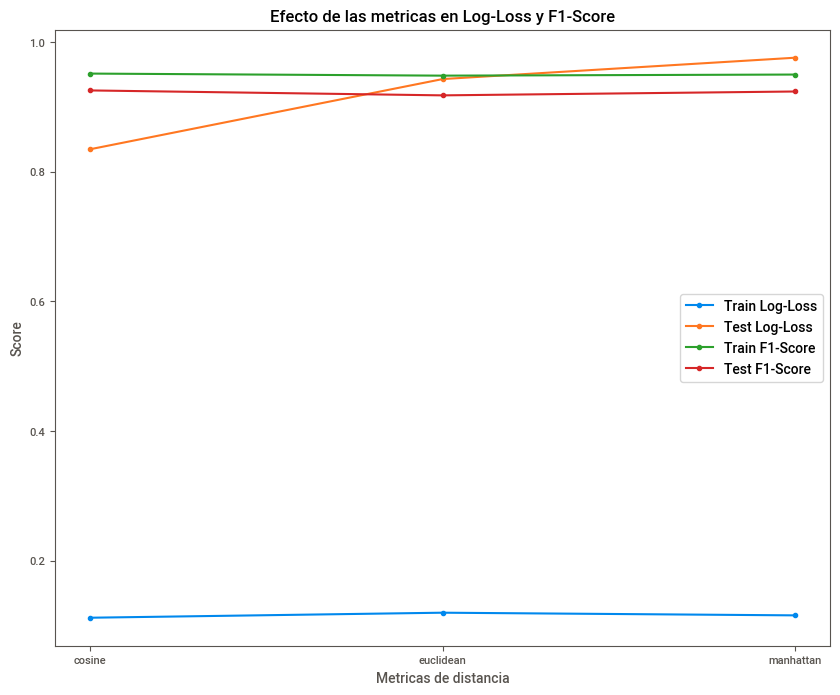

In [ ]:
# Definir el rango de valores para 
metrics = ['cosine','euclidean','manhattan']  

train_log_losses = []
test_log_losses = []
train_f1_scores = []
test_f1_scores = []

for metric in metrics:
    model = KNeighborsClassifier(metric=metric)
    model.fit(X_train, y_train_encoded)
    
    # Predicciones
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # F1-Score
    train_f1 = f1_score(y_train_encoded, train_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, test_pred, average='weighted')
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)
    
    # Log-Loss
    train_proba = model.predict_proba(X_train)
    test_proba = model.predict_proba(X_test)
    train_ll = log_loss(y_train_encoded, train_proba)
    test_ll = log_loss(y_test_encoded, test_proba)
    train_log_losses.append(train_ll)
    test_log_losses.append(test_ll)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.plot(metrics, train_log_losses, label='Train Log-Loss', marker='o')
plt.plot(metrics, test_log_losses, label='Test Log-Loss', marker='o')
plt.plot(metrics, train_f1_scores, label='Train F1-Score', marker='o')
plt.plot(metrics, test_f1_scores, label='Test F1-Score', marker='o')
plt.xlabel('Metricas de distancia')
plt.ylabel('Score')
plt.title('Efecto de las metricas en Log-Loss y F1-Score')
plt.legend()
plt.show()

In [70]:
model = KNeighborsClassifier()

In [ ]:
gs_f1 = GridSearchCV(model,
                     param_grid={
                         'n_neighbors' : range(10,30,1),
                         'weights': ['uniform','distance'],
                         'algorithm': ['auto','ball_tree','kd_tree','brute'], 
                         'metric': ['cosine','euclidean','manhattan']
                     },
                     cv=5,
                     scoring='f1_weighted')  # Usar F1-score ponderado

# Entrenamiento
gs_f1.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (F1-score):", gs_f1.best_params_)
print("Best F1-weighted score:", gs_f1.best_score_)

Best parameters (F1-score): {'algorithm': 'auto', 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}
Best F1-weighted score: 0.9185612754957712


c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.90314561 0.91856128 0.90017573 0.91493647 0.89833652 0.91466889
 0.8967821  0.91292427 0.89610624 0.9128341  0.89440209 0.9108933
 0.89264722 0.91069128 0.89060368 0.90976028 0.88721691 0.90852034
 0.88557487 0.90690858 0.88476628 0.90470813 0.88234561 0.90362047
 0.87895467 0.90147272 0.8769573  0.90045089 0.8727534  0.89844226
 0.87118052 0.89660882 0.86978047 0.89625698 0.86879882 0.89584837
 0.86627143 0.89383313 0.86545226 0.89293012 0.89697642 0.90874774
 0.89576785 0.90534012 0.89136077 0.9044924  0.88889272 0.89922938
 0.88391576 0.89814701 0.88197554 0.89259844 0.87813566 0.89217444
 0.87639163 0.88940156 0.87374779 0.88835002 0.87264687 0.88587718
 0.86763479 0.88371919 0.86588476 0.88072853 0.86164522 0.87901293
 0.86006355 0.87678077 0.85685507 0.87448081 0.85558476 0.87253247
 0.85135187 0.86915801 0.85145576 0.8672726

In [71]:
# Configuración de Grid Search con Log-Loss
gs_logloss = GridSearchCV(model,
                          param_grid={
                         'n_neighbors' : range(10,30,1),
                         'weights': ['uniform','distance'],
                         'algorithm': ['auto','ball_tree','kd_tree','brute'], 
                         'metric': ['cosine','euclidean','manhattan']
                          },
                          cv=5,
                          scoring='neg_log_loss')  # Usar log-loss negativo

# Entrenamiento
gs_logloss.fit(X_train, y_train_encoded)

# Mejor modelo y métrica obtenidos
print("Best parameters (Log-Loss):", gs_logloss.best_params_)
print("Best Log-Loss (negative):", gs_logloss.best_score_)  # Convertir a positivo


Best parameters (Log-Loss): {'algorithm': 'auto', 'metric': 'cosine', 'n_neighbors': 29, 'weights': 'distance'}
Best Log-Loss (negative): -0.442615187253341


c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\esteb\.conda\envs\ITESO_1\lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._f

In [72]:
#crear modelo usando parámetros óptimos
KNN_model_f1 = KNeighborsClassifier(algorithm='auto',
                               metric = 'cosine',
                               n_neighbors = 10,
                               weights='distance',
                               )
#Entrenamiento
KNN_model_f1.fit(X_train, y_train_encoded)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

In [73]:
#crear modelo usando parámetros óptimos
KNN_model_Logloss = KNeighborsClassifier(algorithm='auto',
                               metric = 'cosine',
                               n_neighbors = 29,
                               weights='distance',
                               )
#Entrenamiento
KNN_model_Logloss.fit(X_train, y_train_encoded)

KNeighborsClassifier(metric='cosine', n_neighbors=29, weights='distance')

In [74]:
# Evaluacion del modelo
y_pred_f1 = KNN_model_f1.predict(X_test)
f1 = f1_score(y_test_encoded,y_pred_f1,average='weighted')

In [75]:
y_pred_Logloss = KNN_model_Logloss.predict_proba(X_test)
Logloss = log_loss(y_test, y_pred_Logloss)

In [76]:
print('f1\t Logloss\n %0.3f\t %0.3f'%(f1,Logloss))

f1	 Logloss
 0.931	 0.409


In [77]:
metrics_df.loc['KNN'] = [Logloss, f1]

Text(0.5, 1.0, 'Matriz de Confusión')

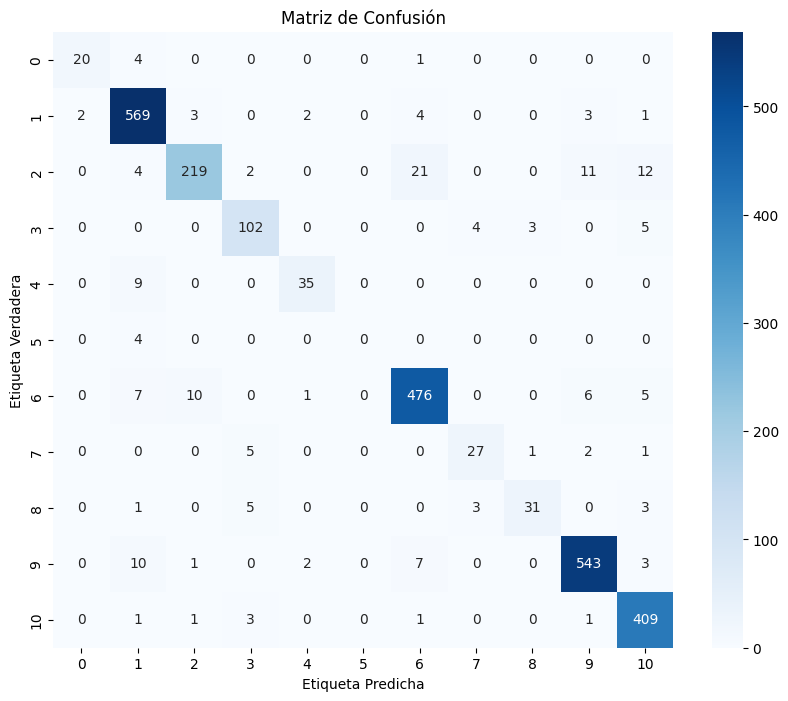

In [78]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_f1)

# Visualización con etiquetas de clase
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')

In [79]:
# Contar los datos en cada categoría
category_counts = pd.Series(y_test_encoded).value_counts().sort_index()

# Calcular las predicciones correctas e incorrectas
correct_predictions = pd.Series([y_test_encoded[i] == y_pred_f1[i] for i in range(len(y_test_encoded))])
correct_counts = pd.Series(y_test_encoded[correct_predictions]).value_counts().sort_index()
incorrect_counts = category_counts - correct_counts

# Crear el DataFrame final
results_df = pd.DataFrame({
    'Total': category_counts,
    'Correctas': correct_counts,
    'Incorrectas': incorrect_counts
}).fillna(0).astype(int)

results_df

,Total,Correctas,Incorrectas
0,25,20,5
1,584,569,15
2,269,219,50
3,114,102,12
4,44,35,9
5,4,0,0
6,505,476,29
7,36,27,9
8,43,31,12
9,566,543,23


### **Comparacion de modelos**

#### **Metricas en conjunto de pruebas**

In [80]:
metrics_df

,Log Loss,F1 Score
XGBoost,2.043555,0.689358
RandomForest,1.523055,0.680784
SVC,0.461048,0.741138
MLPC,0.302915,0.808542
KNN,0.408865,0.931135


#### **Metricas en Datos nuevos**

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [82]:
metrics_df_SMOTE = pd.DataFrame(columns=["Log Loss", "F1 Score"])

In [83]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.transform(X_resampled)
y_resampled = label_encoder.transform(y_resampled)

In [84]:
#XGBoost
y_pred_f1 = XGB_model_f1.predict(X_resampled)
y_pred_Logloss = XGB_model_Logloss.predict_proba(X_resampled)

metrics_df_SMOTE.loc['XGBoost'] = [log_loss(y_resampled, y_pred_Logloss),f1_score(y_resampled,y_pred_f1,average='weighted')]

#Random Forest
y_pred_f1 = RTC_model_f1.predict(X_resampled)
y_pred_Logloss = RTC_model_Logloss.predict_proba(X_resampled)

metrics_df_SMOTE.loc['RandomForest'] = [log_loss(y_resampled, y_pred_Logloss),f1_score(y_resampled,y_pred_f1,average='weighted')]

#SVC
y_pred_f1 = SVC_model_f1.predict(X_resampled)
y_pred_Logloss = SVC_model_Logloss.predict_proba(X_resampled)

metrics_df_SMOTE.loc['SVC'] = [log_loss(y_resampled, y_pred_Logloss),f1_score(y_resampled,y_pred_f1,average='weighted')]

#MLPC
y_resampled_cat = to_categorical(y_resampled, num_classes=11)

y_loss, y_f1_score = MLPC_model.evaluate(X_resampled, y_resampled_cat)

metrics_df_SMOTE.loc['MLPC'] = [y_loss,y_f1_score]

#KNN
y_pred_f1 = KNN_model_f1.predict(X_resampled)
y_pred_Logloss = KNN_model_Logloss.predict_proba(X_resampled)

metrics_df_SMOTE.loc['KNN'] = [log_loss(y_resampled, y_pred_Logloss),f1_score(y_resampled,y_pred_f1,average='weighted')]

1004/1004 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 0.7234 - loss: 0.1450


In [85]:
metrics_df_SMOTE

,Log Loss,F1 Score
XGBoost,2.210498,0.323777
RandomForest,3.272610,0.432047
SVC,0.667409,0.283863
MLPC,0.288172,0.911507
KNN,0.677309,0.884716


#### **Comparacion de Resultados**

In [86]:
print("Metricas en conjunto de original:\n")
display(metrics_df)
print("Metricas en conjunto de SMOTE:\n")
display(metrics_df_SMOTE)

Metricas en conjunto de original:



,Log Loss,F1 Score
XGBoost,2.043555,0.689358
RandomForest,1.523055,0.680784
SVC,0.461048,0.741138
MLPC,0.302915,0.808542
KNN,0.408865,0.931135


Metricas en conjunto de SMOTE:



,Log Loss,F1 Score
XGBoost,2.210498,0.323777
RandomForest,3.272610,0.432047
SVC,0.667409,0.283863
MLPC,0.288172,0.911507
KNN,0.677309,0.884716


### **Conclusiones**

1. **Conjunto Original:**  
   - Entre los modelos basados en árboles de decisión, como XGBoost y RandomForest, encontramos un comportamiento contrastante.  
     - **XGBoost** obtuvo un F1 Score de **0.6836**, pero con un Log Loss relativamente alto (**2.0516**). Esto sugiere que este modelo tiene problemas para balancear la predicción entre clases, favoreciendo principalmente a la clase mayoritaria.
     - Por otro lado, **RandomForest**, aunque obtuvo un F1 Score ligeramente superior (**0.6919**), logró un mejor Log Loss (**1.6663**), esto indica un desempeño más balanceado en la predicción de todas las clases. Esto lo posiciona como un mejor candidato que XGBoost para el conjunto original.  

   - En cuanto a los demás modelos:  
     - **KNN** sobresalió con el mejor F1 Score (**0.9235**) y un Log Loss aceptable (**0.5474**), mostrando un excelente balance entre la predicción de clases mayoritarias y minoritarias.  
     - **MLPC** (Red Neuronal Multicapa) obtuvo un F1 Score de **0.7747** con el Log Loss más bajo (**0.3305**), lo que lo hace competitivo frente a KNN, especialmente por su potencial de mejora mediante ajustes en la arquitectura.  
     - **SVC**, aunque con un F1 Score bueno (**0.7376**) y Log Loss (**0.4657**), implica un alto costo computacional, lo que lo hace menos práctico para este tipo de problemas, considerando el tamaño de los datos.

2. **Conjunto con SMOTE:**  
   Al aplicar SMOTE para balancear las clases, observamos cambios significativos:  
   - Los modelos basados en árboles de decisión como **XGBoost** y **RandomForest** tuvieron una reducción importante en su F1 Score (**0.3089 y 0.3483**) respectivamente, lo que indica que no se beneficiaron de manera efectiva del sobremuestreo. Además, su Log Loss aumentó considerablemente (**2.2387 y 4.7205**) respectivamente, reflejando un desempeño menos estable.  
   - **MLPC**, en cambio, se destacó como el segundo mejor modelo bajo SMOTE, con un F1 Score de **0.7806** y un Log Loss de **0.7745**, mostrando que las redes neuronales pueden aprovechar muy bien la información añadida mediante sobremuestreo.  
   - **KNN** vuelve a ser el mejor modelo con resultados bajo SMOTE, con un F1 Score de **0.8608** y un Log Loss de **0.6942**, confirmando su capacidad para adaptarse a datos balanceados.  
   - **SVC**, a pesar de que antes fue un buen modelo ahora vemos que es practicamente inservible, mostró un F1 Score bajo (**0.2662**) y no logró aprovechar adecuadamente el sobremuestreo.

**Conclusión Final:**  
En el conjunto original, los mejores resultados se obtuvieron con **KNN**, gracias a su excelente F1 Score y buen manejo de todas las clases, seguido de cerca por **MLPC**, que destaca por su potencial de mejora con una arquitectura más robusta. En el caso del conjunto balanceado con SMOTE, **KNN** se posiciona nuevamente como el mejor modelo, superando aun a **MLPC** aunque no por mucho, lo que sugiere que las redes neuronales si bien tienen un gran potencial para este problema la arquitectura que tenemos aun no supera al modelo **KNN**.  

Para futuras mejoras, se podría explorar:
- El uso de algoritmos genéticos o búsquedas avanzadas para optimizar los hiperparámetros.  
- Redes neuronales más complejas (deep learning) para capturar mejor la relación entre las clases.  
- Estrategias adicionales de balanceo de datos para mejorar el desempeño de los modelos basados en árboles de decisión.  

Con estos ajustes, se espera mejorar la generalización y estabilidad de los modelos en problemas con datos desbalanceados.